In [247]:
Xf.shape

(46949, 87, 3)

In [249]:
sys.path.append(r'C:')

import DomainTools as dt

In [257]:
dom_sz = 6
cutoff = 0.33

def compute_domain_starts(coordinates):
    dom_starts_all = []
    for zxy_ in (coordinates):
        bad = np.where(np.isnan(zxy_[:,0]))[0]
        zxy__ = np.array([dt.interp1dnan(x_) for x_ in zxy_.T]).T

        zxy___ = zxy__

        # get initial guess of where a domains boundary is
        dists = np.array([np.linalg.norm(np.nanmean(zxy___[max(i-dom_sz,0):i],axis=0)-\
                                np.nanmean(zxy___[i:i+dom_sz],axis=0)) 
                                  for i in range(len(zxy___))])
        bds = dt.get_ind_loc_max(dists,cutoff_max=0,valley=dom_sz)
        dom_starts= [0]+[dm for dm in bds if dm>1 and dm<len(zxy___)-2]
        mat = squareform(pdist(zxy___))
        dom_starts_ = dom_starts
        # fuse domains untill cannot fuse anymore based on cutoff.
        if len(dom_starts)>1:
            dom_starts_,seps = dt.fuse_doms(mat,dom_starts,tag='median',cut_off=cutoff)
        dom_starts_all+=[dom_starts_[1:]]
        
    return dom_starts_all

In [279]:
np.array(cell_type_cells.values()).flatten().shape[0] == Xf.shape[0]

False

In [278]:
np.array(cell_type_cells.values()).flatten().shape[0]

1

In [293]:
 Xf.shape

(46949, 87, 3)

In [281]:
np.array(cell_type_cells.values()).flatten()

array([dict_values([array([ 120009,  120016,  120034, ..., 1210222, 1210238, 1210259]), array([  10028,   10031,   10035, ..., 1230286, 1230313, 1230337]), array([ 120014,  120147,  340062,  100197,  100244,  160034,  160052,
               160073,  160145,  160151,   60132,   60154,   60161,   60227,
                80014,  360026,  380020,  380021,  380039,  380045,  380049,
               380080,  380189,  380190,  380243,  380246,  380249,  350120,
               330021,  110020,  110034,   90174,   90252,   30055,   30091,
                50227,  190211,  370055,  370059,  370076,  420039,  420063,
               420067,  420081,  420084,  420087,  420092,  420093,  420095,
               420108,  420109,  420115,  420117,  420133,  420139,  420146,
               420168,  420192,  420203,  420210,  420211,  420212,  420234,
               420235,  420242,  420243,  420245,  460010,  460011,  460012,
               460016,  460018,  460019,  460021,  460024,  460025,  460031,
    

In [285]:
import itertools
a=list(cell_type_cells.values())
print(len(list(itertools.chain.from_iterable(a))))

17385


In [262]:
all_domain_starts = []
for cell_type in cell_type_cells.keys():
    
    xf_subset = Xf[cell_type_cells[cell_type]]
    all_domain_starts.append(compute_domain_starts(xf_subset))
    

IndexError: index 120009 is out of bounds for axis 0 with size 46949

NameError: name 'experiment_name' is not defined

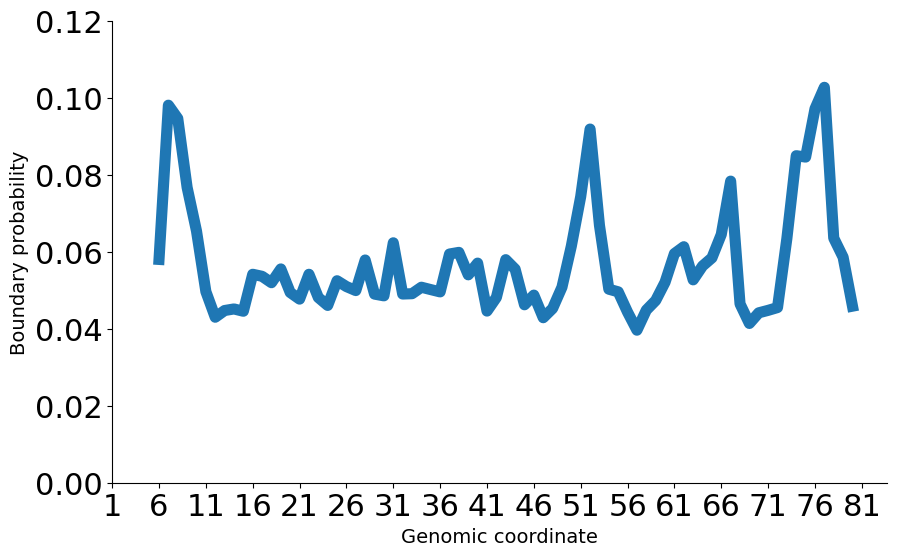

In [256]:
bds_all = [e for dm in dom_starts_all for e in dm]
fig = dt.fig_no_axis(figsize=(10,6))
fracs = np.bincount(bds_all)/float(len(dom_starts_all))
fracs[:dom_sz-1]=np.nan
fracs[-dom_sz+1:]=np.nan
#np.save(post_analysis_folder+ os.sep+r"boundary_prob.npy", fracs)
plt.plot(fracs,'.-', linewidth=8)

plt.xticks(np.arange(fracs.shape[0],step=5), np.arange(1,fracs.shape[0]+1,step=5))
plt.ylabel('Boundary probability',size=14)
plt.xlabel('Genomic coordinate',size=14)
#plt.axvline(25,linestyle='--', color='black',linewidth=2)
plt.ylim(0,0.12)
plt.title("Boundary Probability for\n"+experiment_name)
plt.legend()
#filename = post_analysis_folder+os.sep+r'\Bondary_prob_'+experiment_name[:5]+'.pdf'
#plt.savefig(filename, format='pdf', dpi=400, bbox_inches='tight')
#filename = post_analysis_folder+os.sep+r'\Bondary_prob_'+experiment_name[:5]+'.png'
#plt.savefig(filename, format='png', dpi=400, bbox_inches='tight')

In [265]:
%ls merfish6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis

The system cannot find the path specified.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:06<00:00, 17.86it/s]
C:\Users\carlos\AppData\Local\Temp\3\ipykernel_32776\3381909806.py:20: RuntimeWarning: Mean of empty slice
  cms = np.nanmean(Xf,axis=1)
C:\Users\carlos\AppData\Local\Temp\3\ipykernel_32776\3381909806.py:28: RuntimeWarning: Mean of empty slice
  cm = np.nanmean(Xf[:,:,:],axis=1)[:,np.newaxis]
C:\Users\carlos\anaconda3\envs\scanpy\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


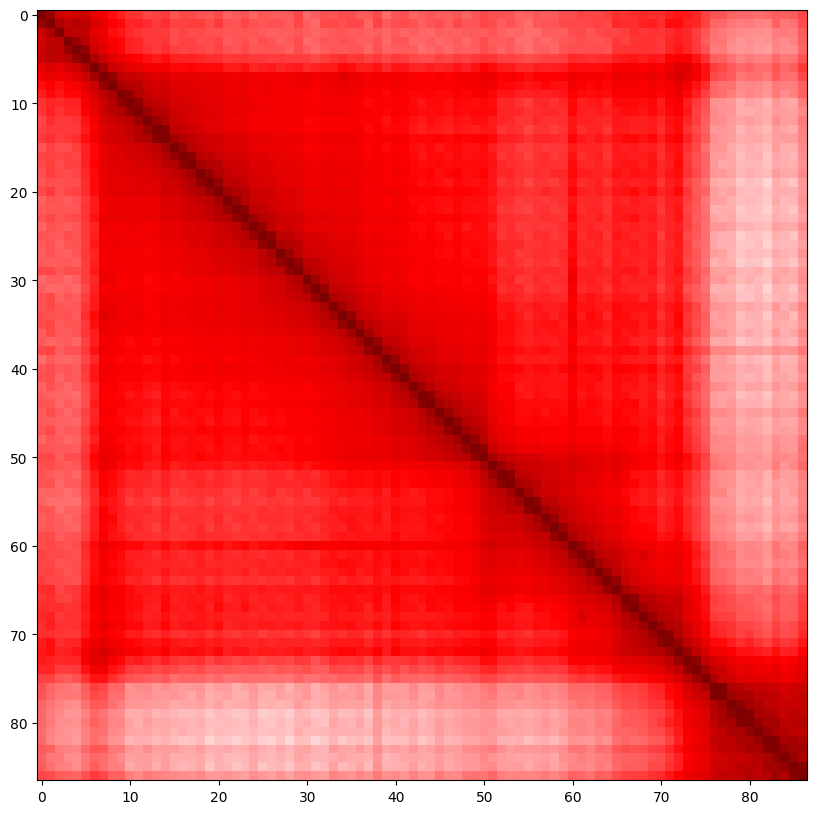

In [5]:
import pickle,numpy as np
import matplotlib.pylab as plt
import glob,os,sys
from tqdm import tqdm
save_folder= r'\\merfish6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis'
save_fls = glob.glob(save_folder+r'\Fov*_zxys_f.pkl')
scores_fs,zxys_fs,cells_fs = [],[],[]


for save_fl in tqdm(save_fls):
    cells_f,zxys_f,hs_f,scores_f = pickle.load(open(save_fl,'rb'))
    zxys_fs+=zxys_f
    scores_fs+=scores_f
    cells_fs+=list(cells_f)
Xf = np.array(zxys_fs)
bad = np.log(scores_fs)<-2.75
Xf[bad] = np.nan


cms = np.nanmean(Xf,axis=1)
Xf_dif = np.nanmean(Xf-cms[:,np.newaxis],axis=0)
Xf-=Xf_dif[np.newaxis]
#elems = np.mean([Xf_dif[icol::ncol] for icol in np.arange(ncol)],axis=0)
#Xf_dif = np.array([e for e in elems for icol in np.arange(ncol)])[:len(Xf_dif)]


ncol=3
cm = np.nanmean(Xf[:,:,:],axis=1)[:,np.newaxis]
for icol in range(ncol):
    Xf[:,icol::ncol,:]-=np.nanmedian(Xf[:,icol::ncol,:],axis=1)[:,np.newaxis]+cm







from scipy.spatial.distance import pdist,squareform
mats = np.array([squareform(pdist(X_)) for X_ in Xf])

plt.figure(figsize=(10,10))
#plt.title('corrected '+str(niter))
keep = np.arange(mats.shape[1])#[2::3]
plt.imshow(np.nanmedian(mats[:,keep][:,:,keep],0),vmax=1,vmin=0.2,cmap='seismic_r')
plt.show()

C:\Users\carlos\anaconda3\envs\scanpy\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


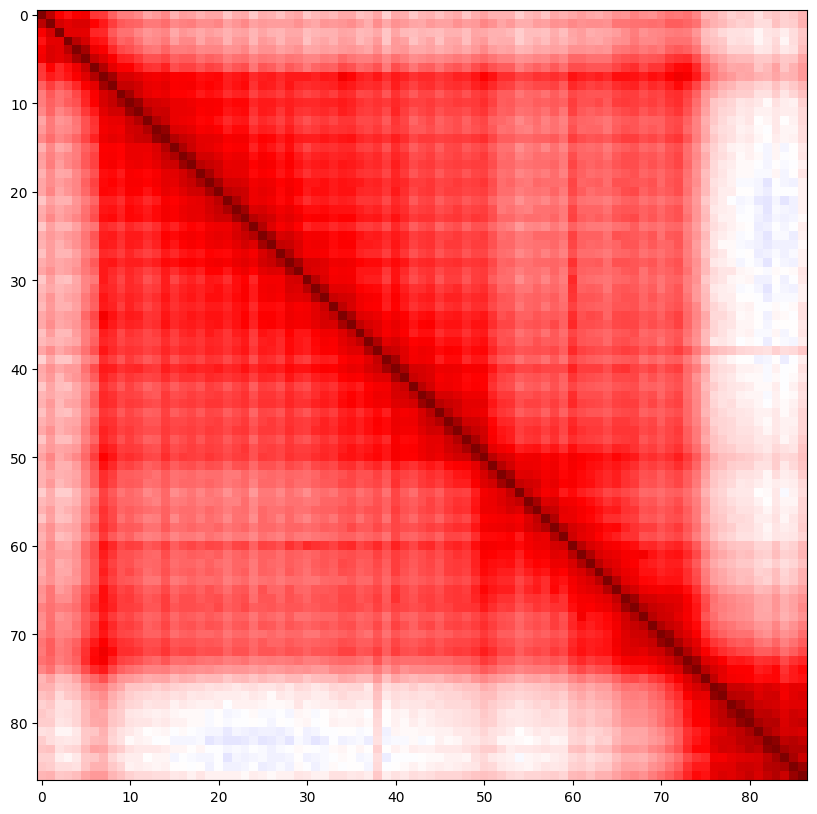

In [6]:
Xf = np.array(zxys_fs)
bad = np.log(scores_fs)<-4
Xf[bad] = np.nan


cms = np.nanmean(Xf,axis=1)
Xf_dif = np.nanmean(Xf-cms[:,np.newaxis],axis=0)
Xf-=Xf_dif[np.newaxis]
#elems = np.mean([Xf_dif[icol::ncol] for icol in np.arange(ncol)],axis=0)
#Xf_dif = np.array([e for e in elems for icol in np.arange(ncol)])[:len(Xf_dif)]


ncol=3
cm = np.nanmean(Xf[:,:,:],axis=1)[:,np.newaxis]
for icol in range(ncol):
    Xf[:,icol::ncol,:]-=np.nanmedian(Xf[:,icol::ncol,:],axis=1)[:,np.newaxis]+cm







from scipy.spatial.distance import pdist,squareform
mats = np.array([squareform(pdist(X_)) for X_ in Xf])

plt.figure(figsize=(10,10))
#plt.title('corrected '+str(niter))
keep = np.arange(mats.shape[1])#[2::3]
plt.imshow(np.nanmedian(mats[:,keep][:,:,keep],0),vmax=1,vmin=0.2,cmap='seismic_r')
plt.show()

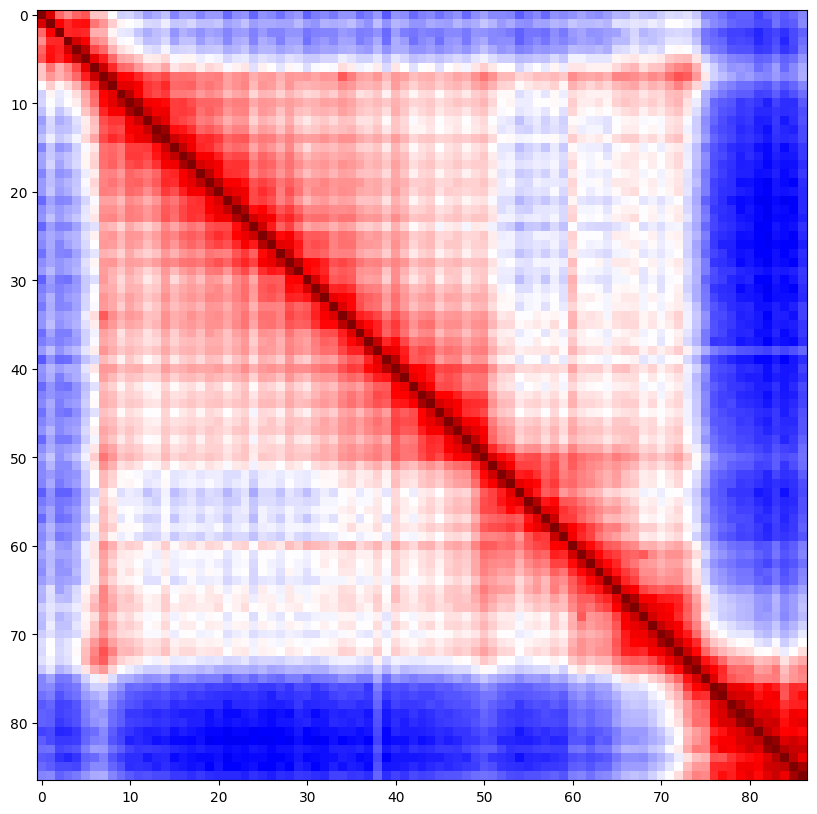

In [7]:
plt.figure(figsize=(10,10))
#plt.title('corrected '+str(niter))
keep = np.arange(mats.shape[1])#[2::3]
plt.imshow(np.nanmedian(mats[:,keep][:,:,keep],0),vmax=0.75,vmin=0.2,cmap='seismic_r')
plt.show()

## load cell types - cell index

## Hi! This is the file type you need!

In [8]:
import os,glob,pickle
save_fld = r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis'
cell_type_cells = pickle.load(open(save_fld+os.sep+'cell_type_cells.pkl','rb'))

In [9]:
cell_type_cells

{'0': array([ 120009,  120016,  120034, ..., 1210222, 1210238, 1210259]),
 '1': array([  10028,   10031,   10035, ..., 1230286, 1230313, 1230337]),
 '10': array([ 120014,  120147,  340062,  100197,  100244,  160034,  160052,
         160073,  160145,  160151,   60132,   60154,   60161,   60227,
          80014,  360026,  380020,  380021,  380039,  380045,  380049,
         380080,  380189,  380190,  380243,  380246,  380249,  350120,
         330021,  110020,  110034,   90174,   90252,   30055,   30091,
          50227,  190211,  370055,  370059,  370076,  420039,  420063,
         420067,  420081,  420084,  420087,  420092,  420093,  420095,
         420108,  420109,  420115,  420117,  420133,  420139,  420146,
         420168,  420192,  420203,  420210,  420211,  420212,  420234,
         420235,  420242,  420243,  420245,  460010,  460011,  460012,
         460016,  460018,  460019,  460021,  460024,  460025,  460031,
         460032,  460033,  460037,  460039,  460041,  460042,  46

In [10]:
%matplotlib inline

In [245]:
mats_.shape

(565, 87, 87)

In [ ]:
scipy.spatial.distanc.squareform
scip

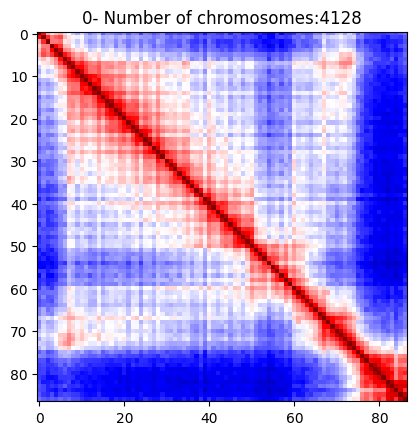

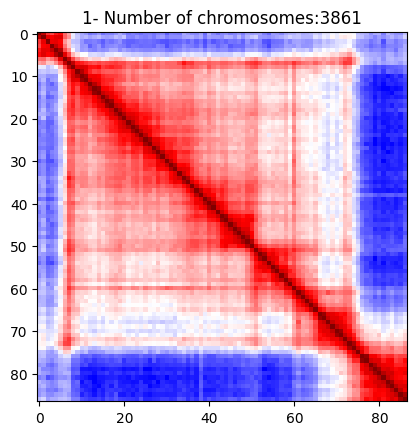

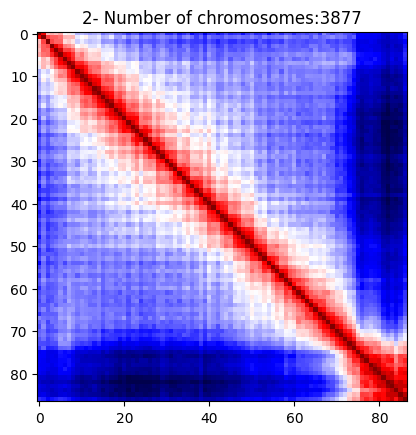

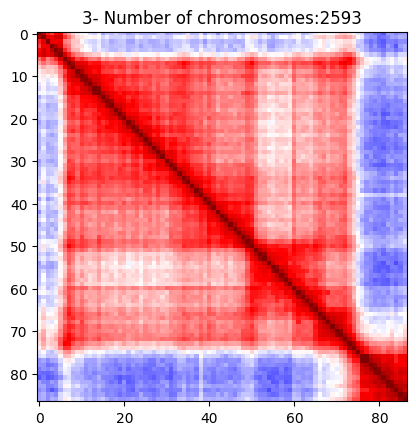

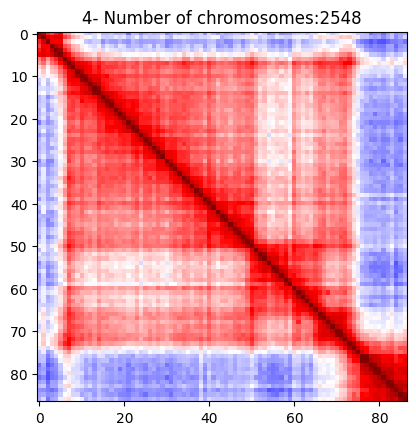

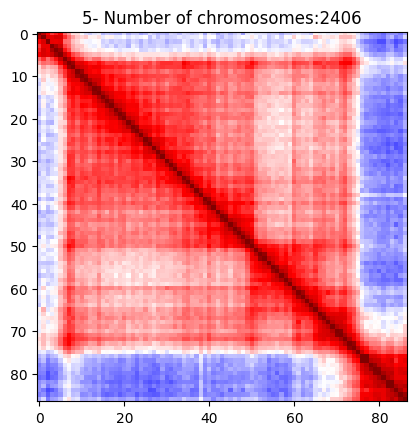

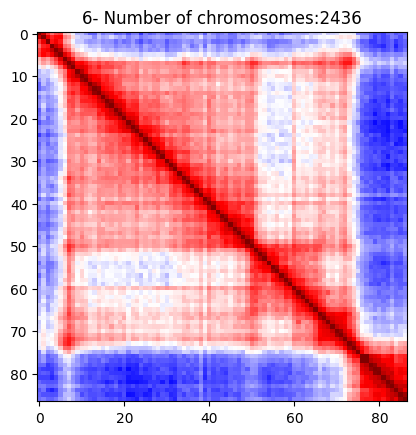

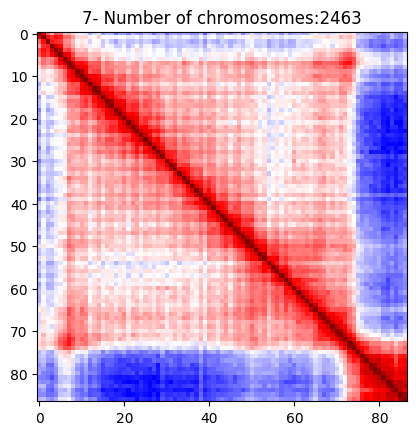

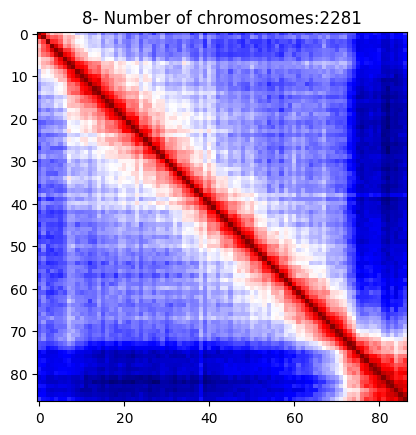

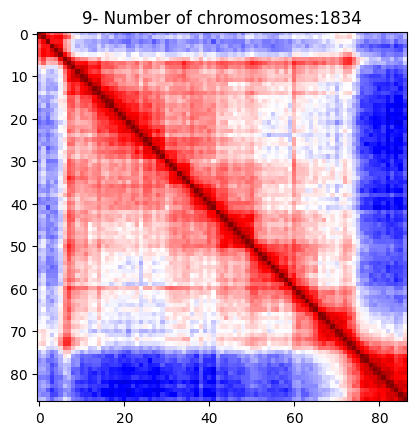

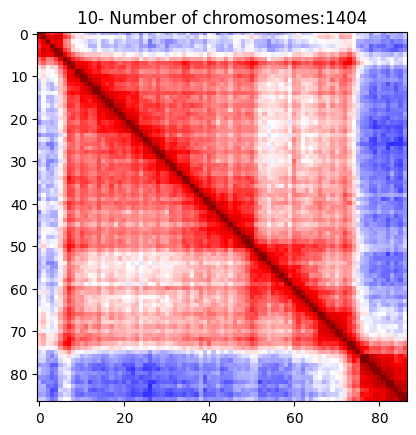

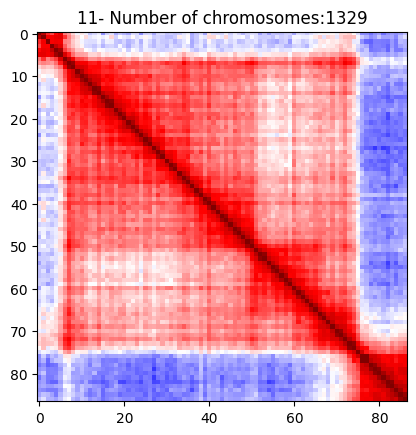

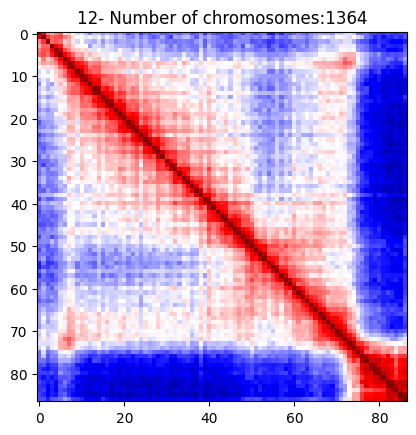

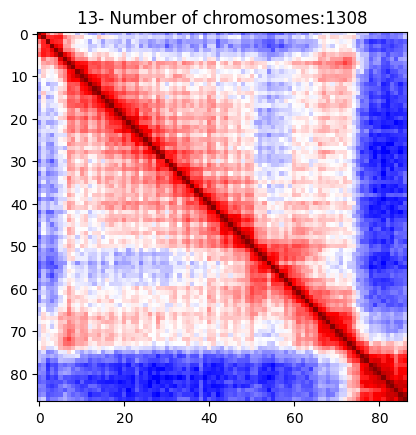

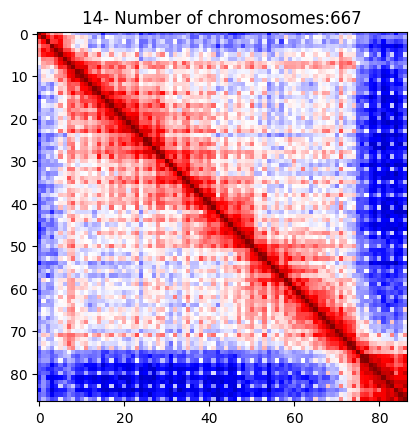

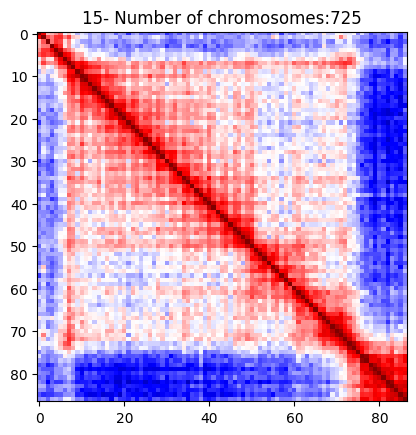

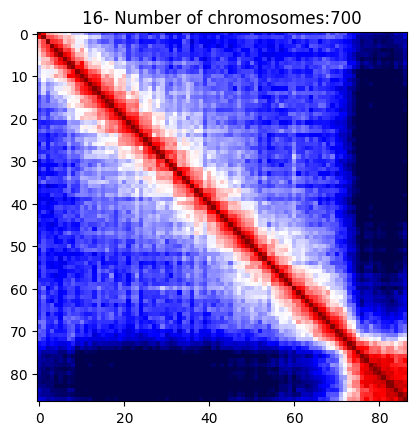

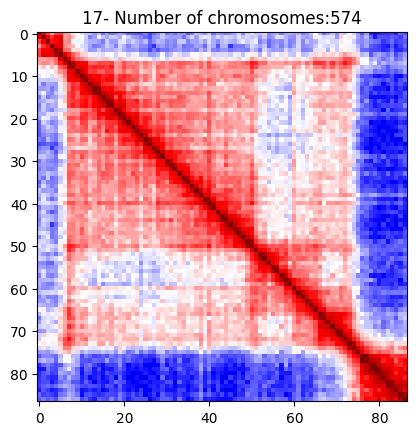

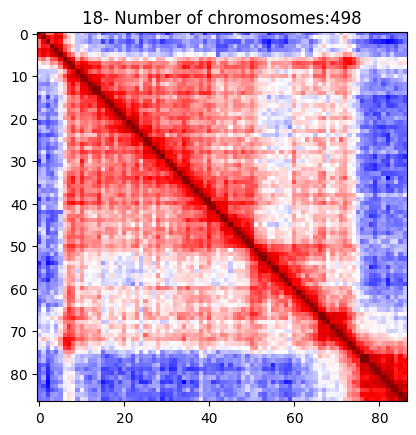

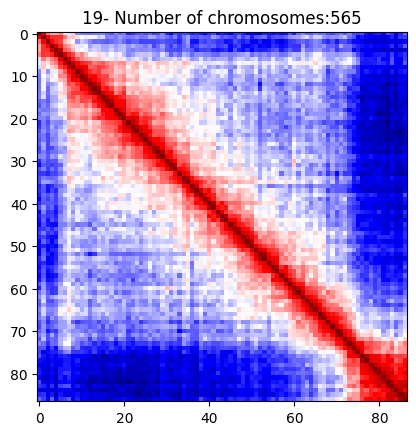

In [243]:
for i in range(20):
    mats_ = mats[np.in1d(cells_fs,cell_type_cells[str(i)])]
    keep = np.arange(mats_.shape[1])#[2::3]
    plt.figure()
    plt.title(str(i)+'- Number of chromosomes:'+str(len(mats_)))
    plt.imshow(np.nanmedian(mats_[:,keep][:,:,keep],0),
               vmax=0.75,vmin=0.2,cmap='seismic_r',interpolation='nearest')
    plt.show()

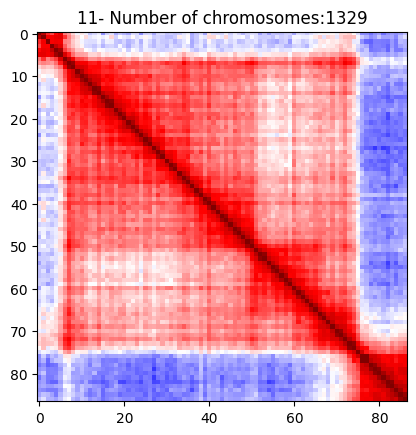

In [15]:

mats_ = mats[np.in1d(cells_fs,cell_type_cells[str(11)])]
keep = np.arange(mats_.shape[1])#[2::3]
plt.figure()
plt.title(str(11)+'- Number of chromosomes:'+str(len(mats_)))
plt.imshow(np.nanmedian(mats_[:,keep][:,:,keep],0),
vmax=0.75,vmin=0.2,cmap='seismic_r',interpolation='nearest')
plt.show()



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


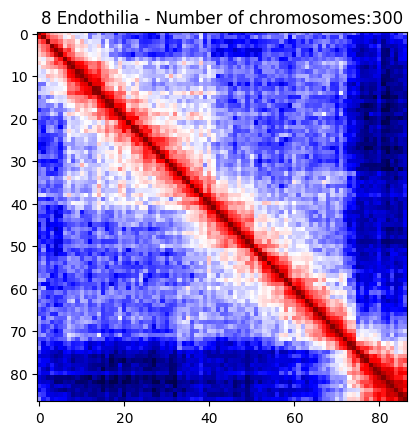

In [179]:
mats_ = mats[np.in1d(cells_fs,cell_type_cells[str(8)])][:300]
keep = np.arange(mats_.shape[1])#[2::3]
print(keep)
plt.figure()
plt.title(str(8)+" Endothilia "+'- Number of chromosomes:'+str(300))
plt.imshow(np.nanmedian(mats_[:,keep][:,:,keep],0),
vmax=0.75,vmin=0.2,cmap='seismic_r',interpolation='nearest')
plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


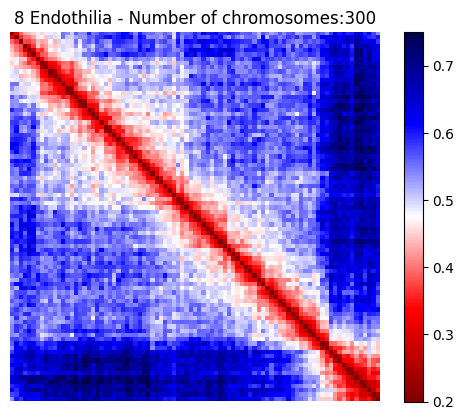

In [237]:
mats_ = mats[np.in1d(cells_fs, cell_type_cells[str(8)])][:300]
keep = np.arange(mats_.shape[1])  # [2::3]
print(keep)

plt.figure()
plt.title(str(8) + " Endothilia " + '- Number of chromosomes:' + str(300))
im = plt.imshow(np.nanmedian(mats_[:, keep][:, :, keep], 0),
                vmax=0.75, vmin=0.2, cmap='seismic_r', interpolation='nearest')
plt.colorbar(im)
plt.axis('off')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


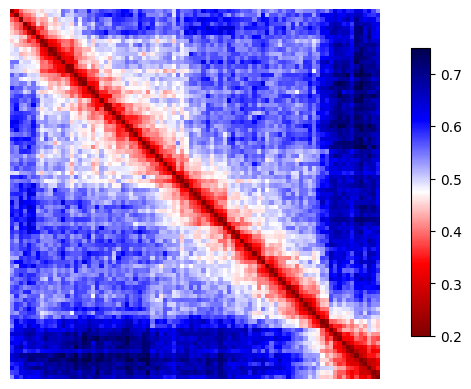

In [238]:
import matplotlib.pyplot as plt
import numpy as np

mats_ = mats[np.in1d(cells_fs, cell_type_cells[str(8)])][:300]
keep = np.arange(mats_.shape[1])
print(keep)

# Create a separate figure for the colorbar
fig, ax = plt.subplots()
im = ax.imshow(np.nanmedian(mats_[:, keep][:, :, keep], 0),
               vmax=0.75, vmin=0.2, cmap='seismic_r', interpolation='nearest')

# Hide the main plot
ax.axis('off')

# Create a separate figure for the colorbar
cax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
fig.colorbar(im, cax=cax)

plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


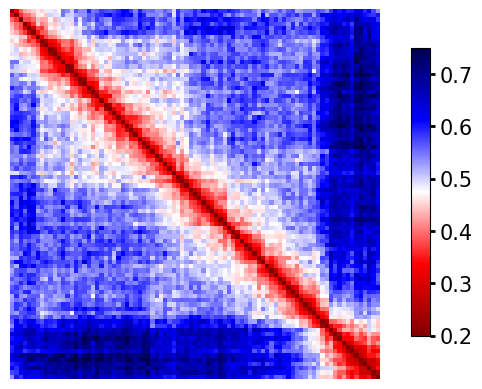

In [239]:
import matplotlib.pyplot as plt
import numpy as np

mats_ = mats[np.in1d(cells_fs, cell_type_cells[str(8)])][:300]
keep = np.arange(mats_.shape[1])
print(keep)

# Create a separate figure for the colorbar
fig, ax = plt.subplots()
im = ax.imshow(np.nanmedian(mats_[:, keep][:, :, keep], 0),
               vmax=0.75, vmin=0.2, cmap='seismic_r', interpolation='nearest')

# Hide the main plot
ax.axis('off')

# Create a separate figure for the colorbar
cax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
cbar = fig.colorbar(im, cax=cax)

# Bolden the colorbar ticks
cbar.ax.tick_params(labelsize=15, width=2)

plt.show()


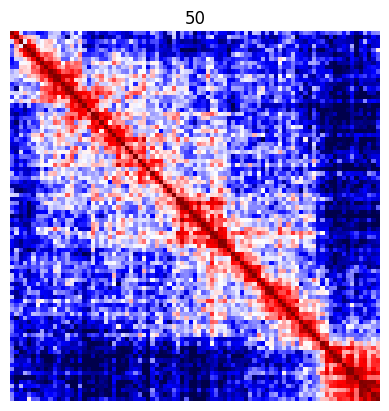

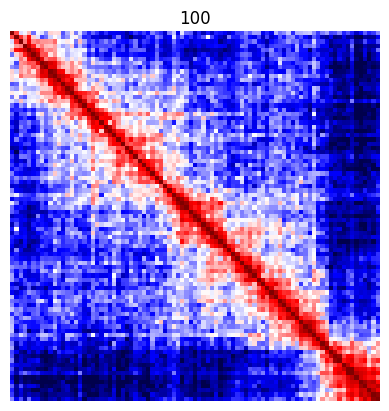

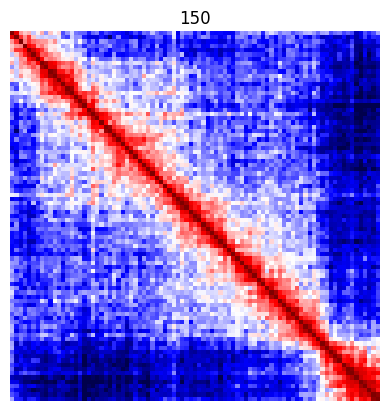

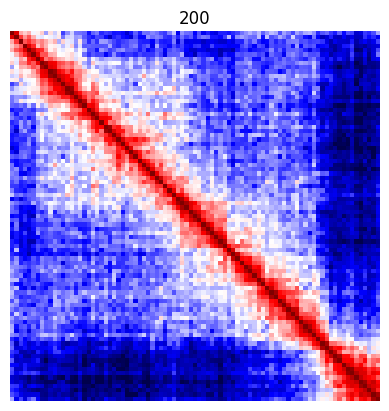

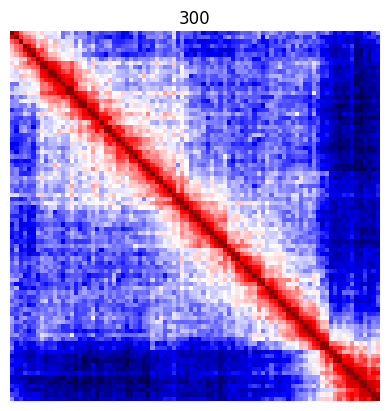

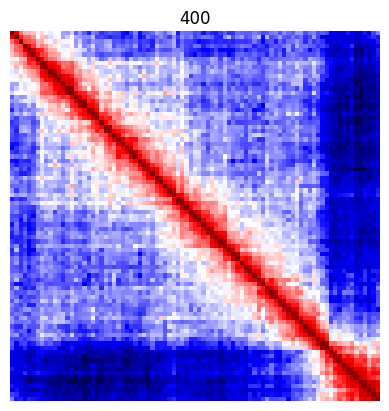

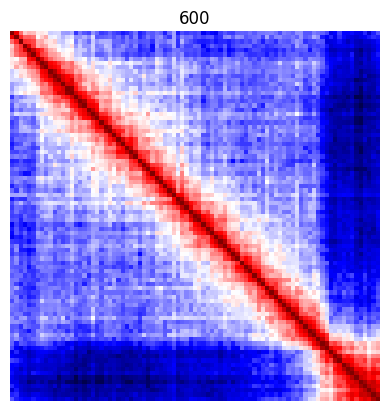

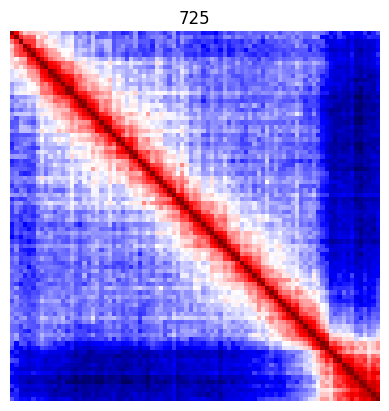

In [228]:
#this is for the endothilial 
#intervals = [10,25,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000,2287]
intervals = [50,100,150,200,300,400,600,725]
#intervals = [725]
for element in intervals:
    mats_ = mats[np.in1d(cells_fs,cell_type_cells[str(8)])][:element]
    keep = np.arange(mats_.shape[1])#[2::3]
    #print(keep)
    plt.figure()
    plt.title(str(len(mats_)))
    plt.imshow(np.nanmedian(mats_[:,keep][:,:,keep],0),
    vmax=0.75,vmin=0.2,cmap='seismic_r',interpolation='nearest')
    title = "Endothelieal"+'- Number of chromosomes:'+str(len(mats_))
    #plt.savefig(title)
    #cbar = plt.colorbar()
    
    #cbar.ax.tick_params(labelsize=15)
  


    # Make the axis lines bolder
    ax = plt.gca()
    ax.spines['left'].set_linewidth(2)  # Bolder left spine
    ax.spines['bottom'].set_linewidth(2)  # Bolder bottom spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.tick_params(width=2)  # Bolder tick width
    
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)\
    # Get only the contents of the axis
    #axis_only_fig = plt.figure()
   # axis_only_ax = axis_only_fig.gca()
   
    #axis_only_ax.set_axis_off()
    #axis_only_ax.plot(x, y, 'o-')
    plt.axis("off")
# Show or save the figure with only the axis contents
    #axis_only_fig.show()  # or axis_only_fig.savefig('axis_only_figure.png')
    #plt.show()


# Endothilial

['Endo_Images\\ENDO10.png', 'Endo_Images\\ENDO100.png', 'Endo_Images\\ENDO1000.png', 'Endo_Images\\ENDO1200.png', 'Endo_Images\\ENDO1400.png', 'Endo_Images\\ENDO150.png', 'Endo_Images\\ENDO1600.png', 'Endo_Images\\ENDO1800.png', 'Endo_Images\\ENDO200.png', 'Endo_Images\\ENDO2000.png', 'Endo_Images\\ENDO2281.png', 'Endo_Images\\ENDO25.png', 'Endo_Images\\ENDO400.png', 'Endo_Images\\ENDO50.png', 'Endo_Images\\ENDO600.png', 'Endo_Images\\ENDO800.png']
Endo_Images\ENDO10.png
0.5669652713445814
Endo_Images\ENDO100.png
0.8579362683351242
Endo_Images\ENDO1000.png
0.976912015642172
Endo_Images\ENDO1200.png
0.991501440353993
Endo_Images\ENDO1400.png
0.9797962124180187
Endo_Images\ENDO150.png
0.883134639421798
Endo_Images\ENDO1600.png
0.9812378750703873
Endo_Images\ENDO1800.png
0.98218704288838
Endo_Images\ENDO200.png
0.8966688759246239
Endo_Images\ENDO2000.png
0.9829768022404317
Endo_Images\ENDO2281.png
1.0
Endo_Images\ENDO25.png
0.7307055407267329
Endo_Images\ENDO400.png
0.9154372428385805
End

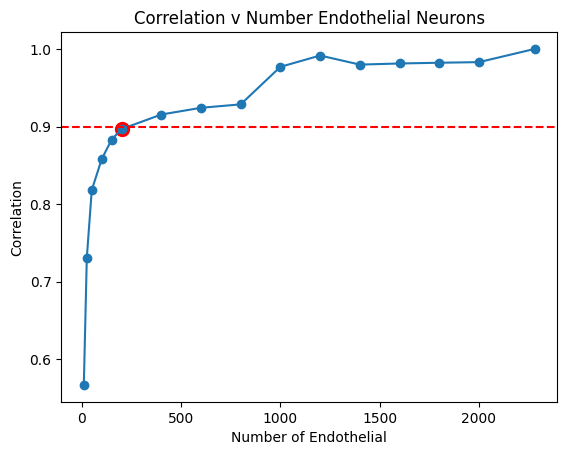

In [171]:
images3 = glob.glob(r"Endo_Images/*.PNG")
print(images3)

reference = Image.open(r'Endo_Images\\ENDO2281.png')
refData = asarray(reference)
dictLol3 = {}
for element in images3:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(),refData.ravel())[0,1]
    print(coff)
    
    dictLol3[element] = coff
    
modified_dict3 = {}

for key in dictLol3:
    modified_key3 = key.split('\\')[-1].split('.')[0]
    modified_key3 = modified_key3.replace('ENDO', '')
    modified_key3 = int(modified_key3)
    modified_dict3[modified_key3] = dictLol3[key]

#print(modified_dict)
Keys3 = list(modified_dict3.keys())
Keys3.sort()
new_dict3 = {key: modified_dict3[key] for key in Keys3}

x = list(new_dict3.keys())
y = list(new_dict3.values())

print(x)
print(y)
plt.plot(x, y,'o-')
plt.xlabel('Number of Endothelial')
plt.ylabel('Correlation')
plt.title('Correlation v Number Endothelial Neurons')

# Specify the index of the point to highlight
highlight_index = 5

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.9
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

plt.show()
#np.perm
##permute what exactly?


['Endo_Images\\ENDO10.png', 'Endo_Images\\ENDO100.png', 'Endo_Images\\ENDO1000.png', 'Endo_Images\\ENDO1200.png', 'Endo_Images\\ENDO1400.png', 'Endo_Images\\ENDO150.png', 'Endo_Images\\ENDO1600.png', 'Endo_Images\\ENDO1800.png', 'Endo_Images\\ENDO200.png', 'Endo_Images\\ENDO2000.png', 'Endo_Images\\ENDO2281.png', 'Endo_Images\\ENDO25.png', 'Endo_Images\\ENDO300.png', 'Endo_Images\\ENDO400.png', 'Endo_Images\\ENDO50.png', 'Endo_Images\\ENDO600.png', 'Endo_Images\\ENDO800.png']
Endo_Images\ENDO10.png
0.5669652713445814
Endo_Images\ENDO100.png
0.8579362683351242
Endo_Images\ENDO1000.png
0.976912015642172
Endo_Images\ENDO1200.png
0.991501440353993
Endo_Images\ENDO1400.png
0.9797962124180187
Endo_Images\ENDO150.png
0.883134639421798
Endo_Images\ENDO1600.png
0.9812378750703873
Endo_Images\ENDO1800.png
0.98218704288838
Endo_Images\ENDO200.png
0.8966688759246239
Endo_Images\ENDO2000.png
0.9829768022404317
Endo_Images\ENDO2281.png
1.0
Endo_Images\ENDO25.png
0.7307055407267329
Endo_Images\ENDO30

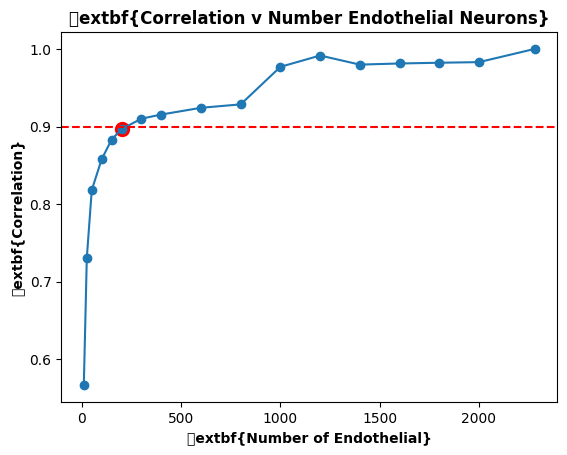

In [214]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

images3 = glob.glob(r"Endo_Images/*.PNG")
print(images3)

reference = Image.open(r'Endo_Images\\ENDO2281.png')
refData = asarray(reference)
dictLol3 = {}
for element in images3:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(), refData.ravel())[0, 1]
    print(coff)

    dictLol3[element] = coff

modified_dict3 = {}

for key in dictLol3:
    modified_key3 = key.split('\\')[-1].split('.')[0]
    modified_key3 = modified_key3.replace('ENDO', '')
    modified_key3 = int(modified_key3)
    modified_dict3[modified_key3] = dictLol3[key]

#print(modified_dict)
Keys3 = list(modified_dict3.keys())
Keys3.sort()
new_dict3 = {key: modified_dict3[key] for key in Keys3}

x = list(new_dict3.keys())
y = list(new_dict3.values())

print(x)
print(y)
plt.plot(x, y, 'o-')
plt.xlabel('\textbf{Number of Endothelial}', fontweight='bold')
plt.ylabel('\textbf{Correlation}', fontweight='bold')
plt.title('\textbf{Correlation v Number Endothelial Neurons}', fontweight='bold')

# Specify the index of the point to highlight
highlight_index = 5

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.9
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

plt.show()
#np.perm
##permute what exactly?


['Endo_Images\\ENDO10.png', 'Endo_Images\\ENDO100.png', 'Endo_Images\\ENDO1000.png', 'Endo_Images\\ENDO1200.png', 'Endo_Images\\ENDO1400.png', 'Endo_Images\\ENDO150.png', 'Endo_Images\\ENDO1600.png', 'Endo_Images\\ENDO1800.png', 'Endo_Images\\ENDO200.png', 'Endo_Images\\ENDO2000.png', 'Endo_Images\\ENDO2281.png', 'Endo_Images\\ENDO25.png', 'Endo_Images\\ENDO300.png', 'Endo_Images\\ENDO400.png', 'Endo_Images\\ENDO50.png', 'Endo_Images\\ENDO600.png', 'Endo_Images\\ENDO800.png']
Endo_Images\ENDO10.png
0.5669652713445814
Endo_Images\ENDO100.png
0.8579362683351242
Endo_Images\ENDO1000.png
0.976912015642172
Endo_Images\ENDO1200.png
0.991501440353993
Endo_Images\ENDO1400.png
0.9797962124180187
Endo_Images\ENDO150.png
0.883134639421798
Endo_Images\ENDO1600.png
0.9812378750703873
Endo_Images\ENDO1800.png
0.98218704288838
Endo_Images\ENDO200.png
0.8966688759246239
Endo_Images\ENDO2000.png
0.9829768022404317
Endo_Images\ENDO2281.png
1.0
Endo_Images\ENDO25.png
0.7307055407267329
Endo_Images\ENDO30

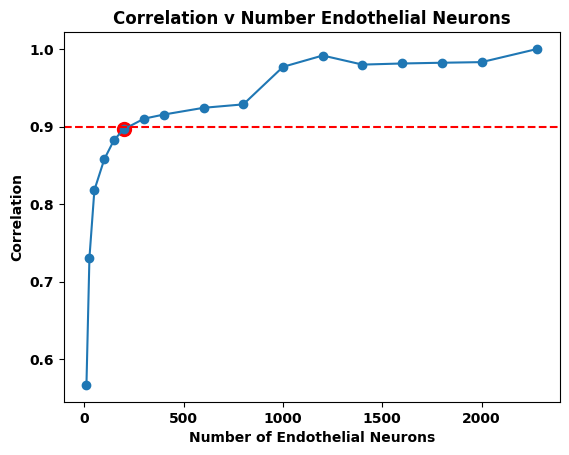

In [216]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

images3 = glob.glob(r"Endo_Images/*.PNG")
print(images3)

reference = Image.open(r'Endo_Images\\ENDO2281.png')
refData = asarray(reference)
dictLol3 = {}
for element in images3:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(), refData.ravel())[0, 1]
    print(coff)

    dictLol3[element] = coff

modified_dict3 = {}

for key in dictLol3:
    modified_key3 = key.split('\\')[-1].split('.')[0]
    modified_key3 = modified_key3.replace('ENDO', '')
    modified_key3 = int(modified_key3)
    modified_dict3[modified_key3] = dictLol3[key]

#print(modified_dict)
Keys3 = list(modified_dict3.keys())
Keys3.sort()
new_dict3 = {key: modified_dict3[key] for key in Keys3}

x = list(new_dict3.keys())
y = list(new_dict3.values())

print(x)
print(y)
plt.plot(x, y, 'o-')
plt.xlabel('Number of Endothelial Neurons', fontweight='bold')
plt.ylabel('Correlation', fontweight='bold')
plt.title('Correlation v Number Endothelial Neurons', fontweight='bold')

# Specify the index of the point to highlight
highlight_index = 5

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.9
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

# Bolden the x and y tick labels
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()
#np.perm
##permute what exactly?


['Endo_Images\\ENDO10.png', 'Endo_Images\\ENDO100.png', 'Endo_Images\\ENDO1000.png', 'Endo_Images\\ENDO1200.png', 'Endo_Images\\ENDO1400.png', 'Endo_Images\\ENDO150.png', 'Endo_Images\\ENDO1600.png', 'Endo_Images\\ENDO1800.png', 'Endo_Images\\ENDO200.png', 'Endo_Images\\ENDO2000.png', 'Endo_Images\\ENDO2281.png', 'Endo_Images\\ENDO25.png', 'Endo_Images\\ENDO300.png', 'Endo_Images\\ENDO400.png', 'Endo_Images\\ENDO50.png', 'Endo_Images\\ENDO600.png', 'Endo_Images\\ENDO800.png']
Endo_Images\ENDO10.png
0.5669652713445814
Endo_Images\ENDO100.png
0.8579362683351242
Endo_Images\ENDO1000.png
0.976912015642172
Endo_Images\ENDO1200.png
0.991501440353993
Endo_Images\ENDO1400.png
0.9797962124180187
Endo_Images\ENDO150.png
0.883134639421798
Endo_Images\ENDO1600.png
0.9812378750703873
Endo_Images\ENDO1800.png
0.98218704288838
Endo_Images\ENDO200.png
0.8966688759246239
Endo_Images\ENDO2000.png
0.9829768022404317
Endo_Images\ENDO2281.png
1.0
Endo_Images\ENDO25.png
0.7307055407267329
Endo_Images\ENDO30

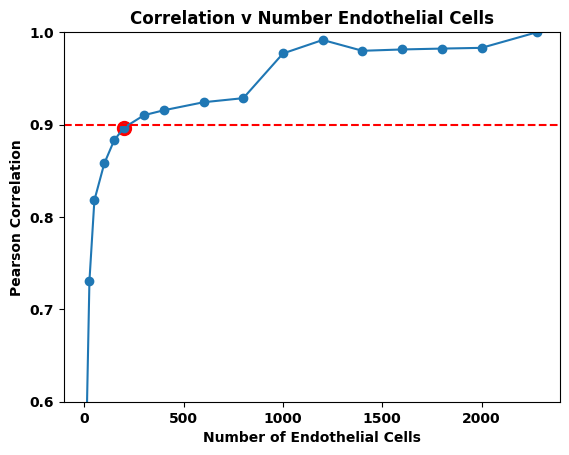

In [224]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

images3 = glob.glob(r"Endo_Images/*.PNG")
print(images3)

reference = Image.open(r'Endo_Images\\ENDO2281.png')
refData = asarray(reference)
dictLol3 = {}
for element in images3:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(), refData.ravel())[0, 1]
    print(coff)

    dictLol3[element] = coff

modified_dict3 = {}

for key in dictLol3:
    modified_key3 = key.split('\\')[-1].split('.')[0]
    modified_key3 = modified_key3.replace('ENDO', '')
    modified_key3 = int(modified_key3)
    modified_dict3[modified_key3] = dictLol3[key]

Keys3 = list(modified_dict3.keys())
Keys3.sort()
new_dict3 = {key: modified_dict3[key] for key in Keys3}

x = list(new_dict3.keys())
y = list(new_dict3.values())

print(x)
print(y)
plt.plot(x, y, 'o-')
plt.xlabel('Number of Endothelial Cells', fontweight='bold')
plt.ylabel('Pearson Correlation', fontweight='bold')
plt.title('Correlation v Number Endothelial Cells', fontweight='bold')

# Specify the index of the point to highlight
highlight_index = 5

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.9
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

# Bolden the x and y tick labels
plt.xticks(fontweight='bold')

# Set y-axis tick locations and labels
ytick_locs = np.arange(0.6, 1.1, 0.1)
ytick_locs = ytick_locs[ytick_locs <= max(y)]
plt.yticks(ytick_locs, fontweight='bold')

plt.ylim((0.6, 1.0))

plt.show()


In [148]:
new_dict3

{10: 0.5669652713445814,
 25: 0.7307055407267329,
 50: 0.818088542197879,
 100: 0.8579362683351242,
 150: 0.883134639421798,
 200: 0.8966688759246239,
 400: 0.9154372428385805,
 600: 0.9241265024824877,
 800: 0.9285389325146799,
 1000: 0.976912015642172,
 1200: 0.991501440353993,
 1400: 0.9797962124180187,
 1600: 0.9812378750703873,
 1800: 0.98218704288838,
 2000: 0.9829768022404317,
 2281: 1.0}

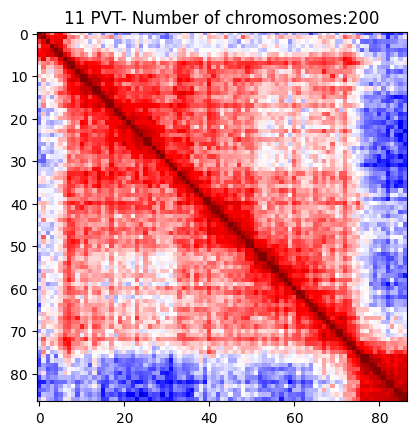

PVT- Number of chromosomes:200.png


<Figure size 640x480 with 0 Axes>

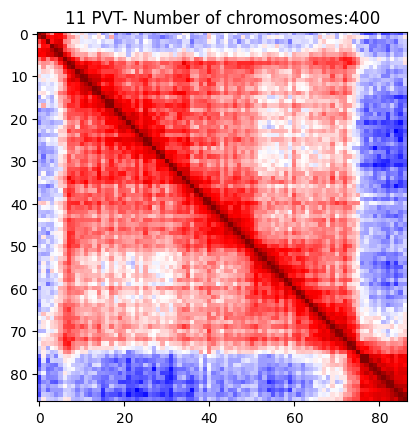

PVT- Number of chromosomes:400.png


<Figure size 640x480 with 0 Axes>

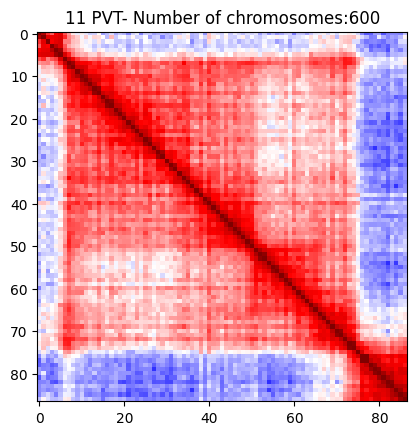

PVT- Number of chromosomes:600.png


<Figure size 640x480 with 0 Axes>

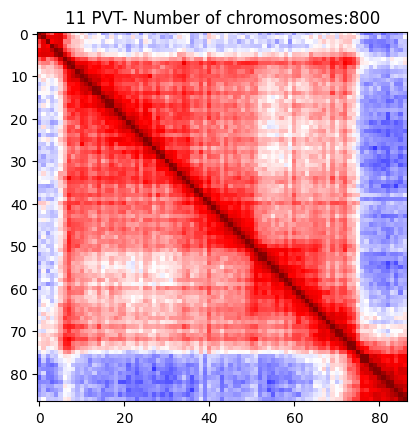

PVT- Number of chromosomes:800.png


<Figure size 640x480 with 0 Axes>

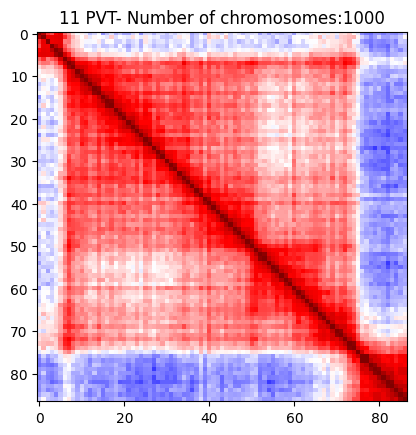

PVT- Number of chromosomes:1000.png


<Figure size 640x480 with 0 Axes>

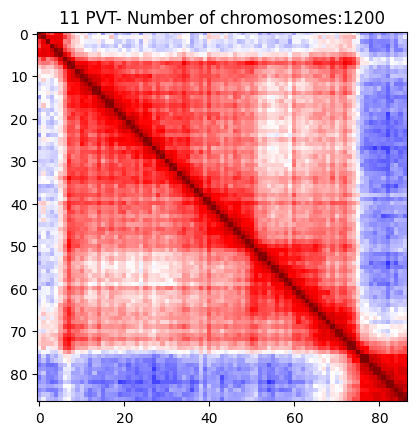

PVT- Number of chromosomes:1200.png


<Figure size 640x480 with 0 Axes>

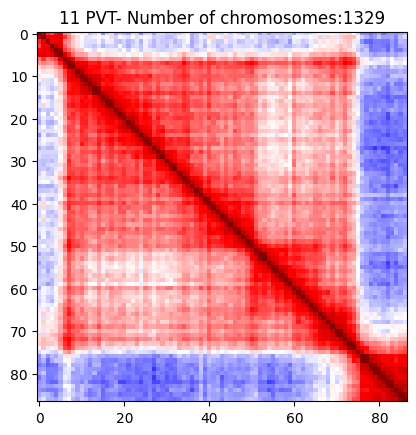

PVT- Number of chromosomes:1329.png


<Figure size 640x480 with 0 Axes>

In [33]:
#this is for the PVT
import matplotlib
intervals = [200,400,600,800,1000,1200,1334]

for element in intervals:
    mats_ = mats[np.in1d(cells_fs,cell_type_cells[str(11)])][:element]
    keep = np.arange(mats_.shape[1])#[2::3]
    #print(keep)
    plt.figure()
    plt.title(str(11)+" PVT"+'- Number of chromosomes:'+str(len(mats_)))
    plt.imshow(np.nanmedian(mats_[:,keep][:,:,keep],0),
    vmax=0.75,vmin=0.2,cmap='seismic_r',interpolation='nearest')
    plt.show()
    
    print(title)
    

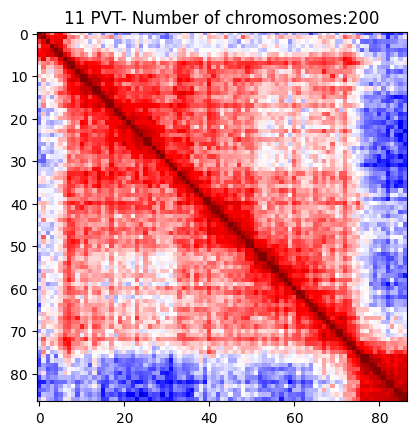

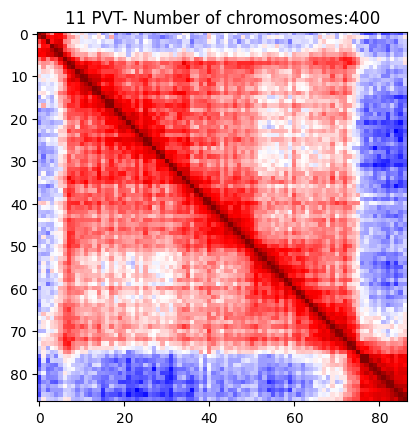

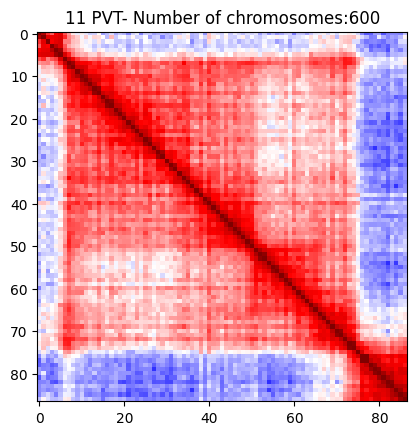

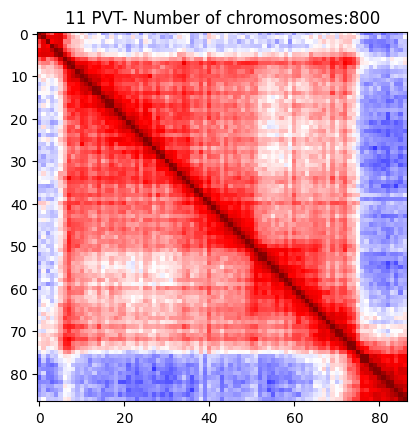

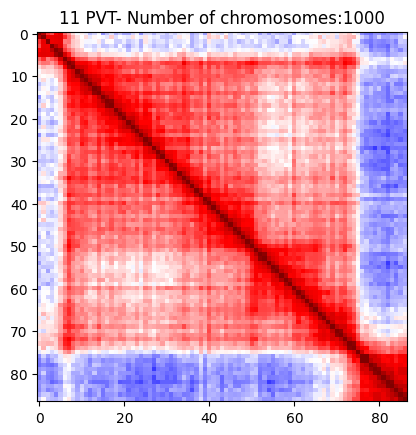

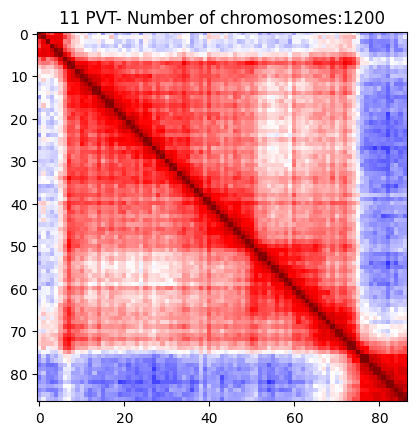

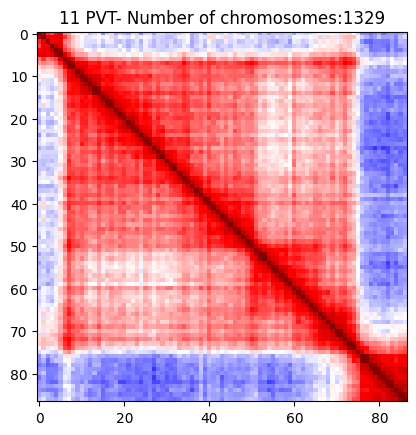

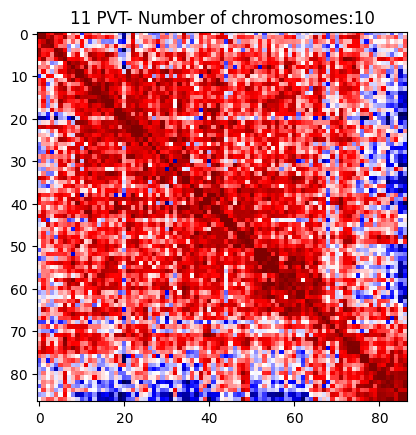

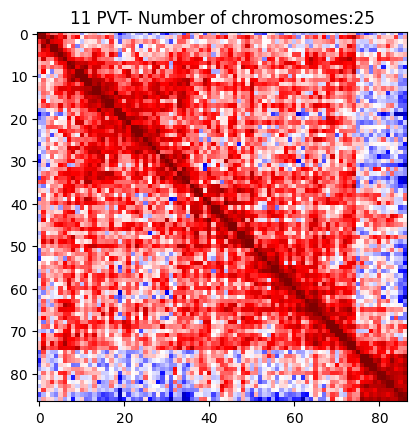

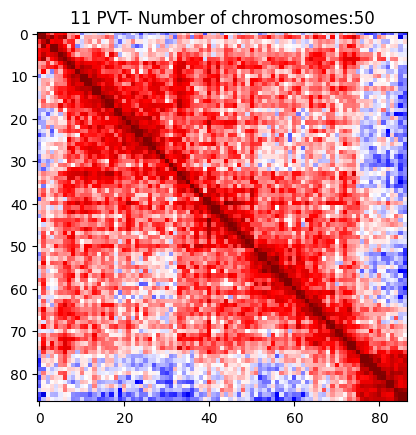

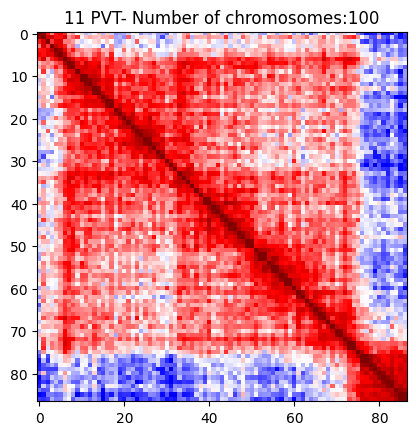

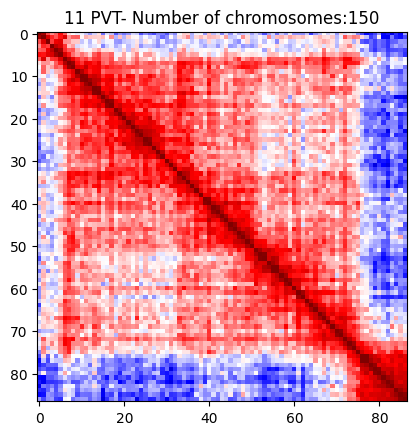

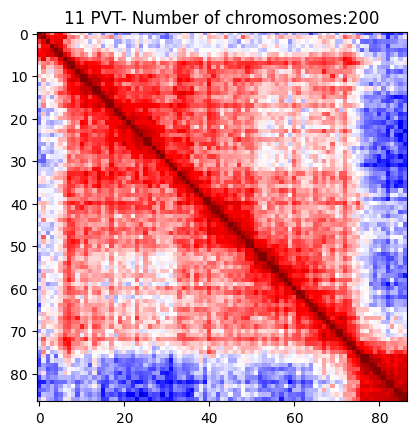

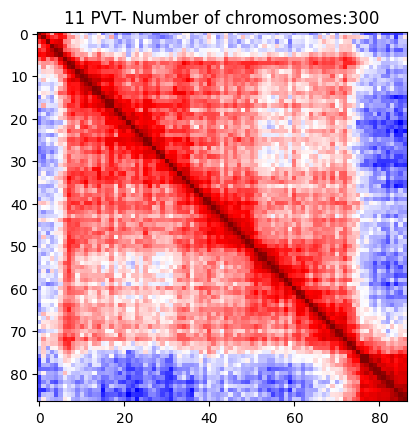

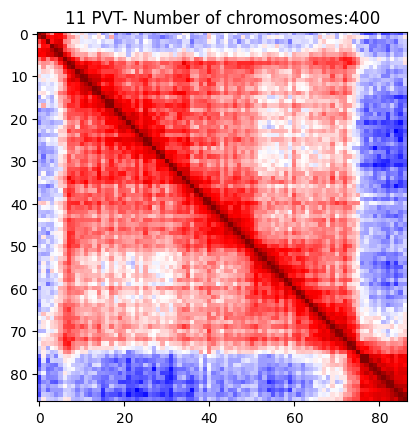

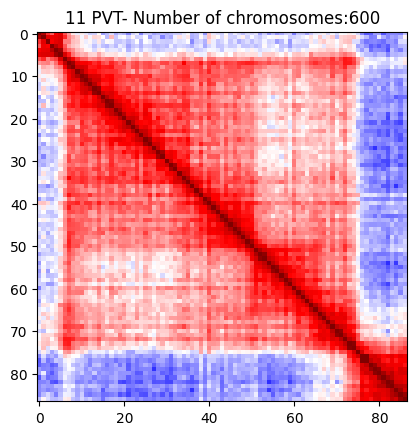

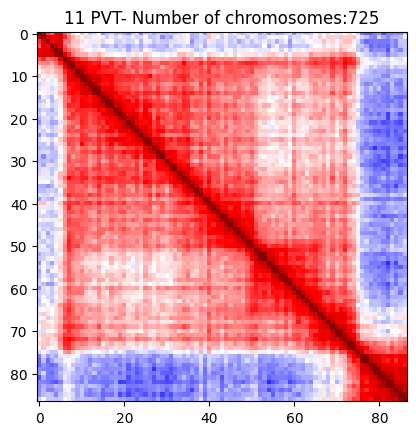

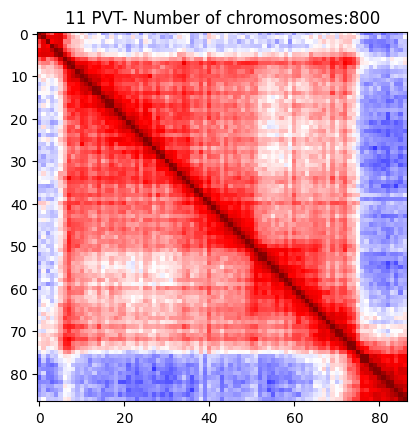

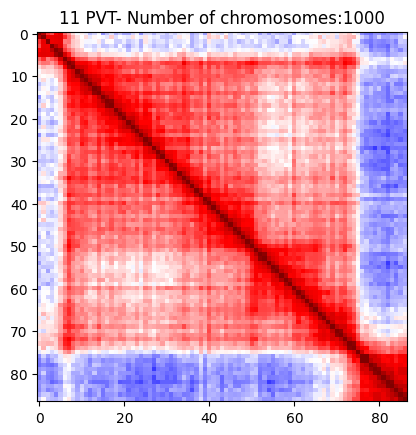

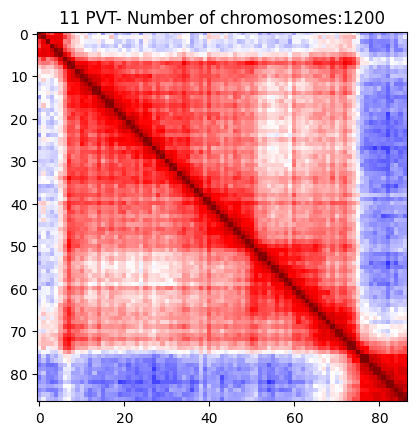

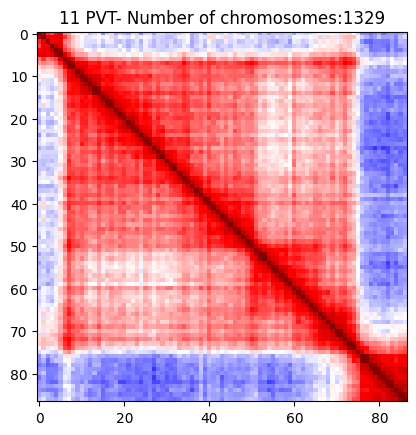

In [178]:
import numpy as np
import matplotlib.pyplot as plt

intervals = [10,25,50,100,150,200,300, 400, 600,725, 800, 1000, 1200, 1334]

for element in intervals:
    mats_ = mats[np.in1d(cells_fs, cell_type_cells[str(11)])][:element]
    keep = np.arange(mats_.shape[1])#[2::3]
    
    plt.figure()
    plt.title(str(11) + " PVT" + '- Number of chromosomes:' + str(len(mats_)))
    plt.imshow(np.nanmedian(mats_[:, keep][:, :, keep], 0),
               vmax=0.75, vmin=0.2, cmap='seismic_r', interpolation='nearest')

    #Add color scale bar
    #cbar = plt.colorbar()
    #cbar.set_label('Intensity')
    
    title = "PVT" + '- Number of chromosomes:' + str(len(mats_)) + ".png"
    #plt.savefig(title)  # Save the figure as an image
    plt.show()


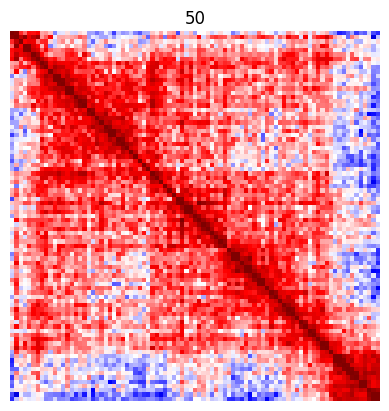

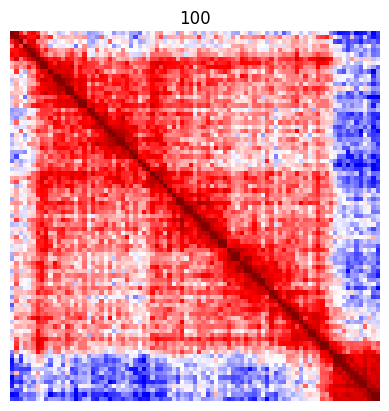

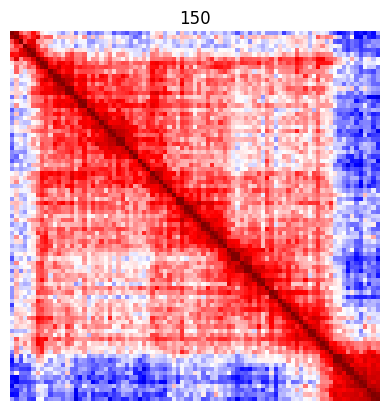

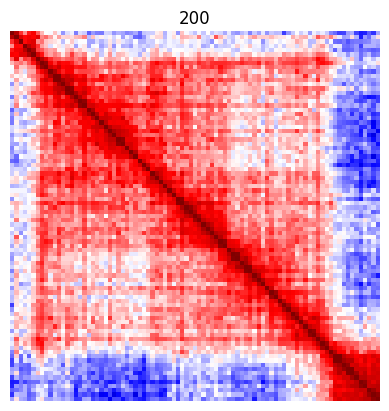

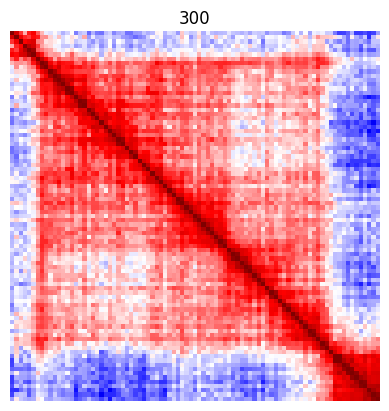

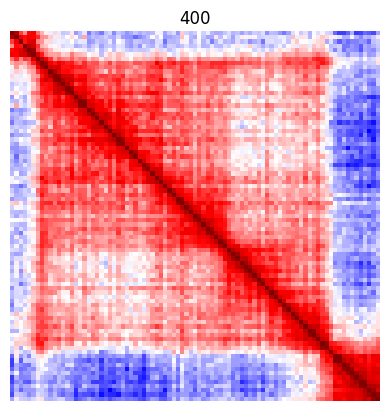

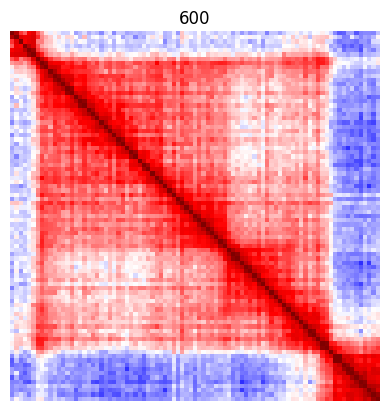

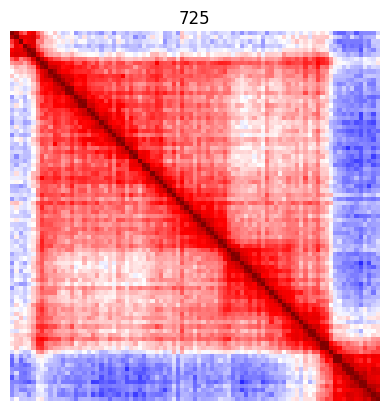

In [229]:
##dont delete this one lol
import numpy as np
import matplotlib.pyplot as plt


#intervals = [10,25,50,100,150,200,300, 400, 600,725, 800, 1000, 1200, 1334]
intervals = [50,100,150,200,300,400,600,725]
#intervals = [725]
for element in intervals:
    mats_ = mats[np.in1d(cells_fs, cell_type_cells[str(11)])][:element]
    keep = np.arange(mats_.shape[1])#[2::3]
    
    plt.figure()
    plt.title(str(len(mats_)))
    plt.imshow(np.nanmedian(mats_[:, keep][:, :, keep], 0),
               vmax=0.75, vmin=0.2, cmap='seismic_r', interpolation='nearest')

    # Add color scale bar
    #cbar = plt.colorbar()
    #cbar.ax.tick_params(labelsize=15)
    #cbar.ax.yaxis.set_tick_params(fontweight='bold')


    # Make the axis lines bolder
    ax = plt.gca()
    ax.spines['left'].set_linewidth(2)  # Bolder left spine
    ax.spines['bottom'].set_linewidth(2)  # Bolder bottom spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.tick_params(width=2)  # Bolder tick width
    
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    title = "PVT" + '- Number of chromosomes:' + str(len(mats_)) + ".png"
    #plt.savefig(title) 
    plt.axis("off")
    plt.show()


## PVT

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import imageio
import glob

images = glob.glob(r"PVT_IMAGES/*.PNG")
print(images)

['PVT_IMAGES\\PVT10.png', 'PVT_IMAGES\\PVT100.png', 'PVT_IMAGES\\PVT1000.png', 'PVT_IMAGES\\PVT1200.png', 'PVT_IMAGES\\PVT1329.png', 'PVT_IMAGES\\PVT150.png', 'PVT_IMAGES\\PVT200.png', 'PVT_IMAGES\\PVT25.png', 'PVT_IMAGES\\PVT400.png', 'PVT_IMAGES\\PVT50.png', 'PVT_IMAGES\\PVT600.png', 'PVT_IMAGES\\PVT800.png']


In [73]:
from PIL import Image
from numpy import asarray
 
 

image = Image.open(r'PVT_IMAGES\\PVT50.png')
maxIm = Image.open(r'PVT_IMAGES\\PVT1329.png')
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata1 = asarray(image)
numpydata2 = asarray(maxIm)
# <class 'numpy.ndarray'>

np.corrcoef(numpydata.ravel(),numpydata2.ravel())[0,1]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(435, 416, 4)
(435, 416, 4)


0.8989693874625305

In [105]:
reference = Image.open(r'PVT_IMAGES\\PVT1329.png')
refData = asarray(reference)
dictLol = {}
for element in images:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(),refData.ravel())[0,1]
    print(coff)
    
    dictLol[element] = coff

PVT_IMAGES\PVT10.png
0.7305335059388378
PVT_IMAGES\PVT100.png
0.8989693874625305
PVT_IMAGES\PVT1000.png
0.9947346864621895
PVT_IMAGES\PVT1200.png
0.997198043395753
PVT_IMAGES\PVT1329.png
1.0
PVT_IMAGES\PVT150.png
0.9184283575193867
PVT_IMAGES\PVT200.png
0.9317046812813558
PVT_IMAGES\PVT25.png
0.7884275118441422
PVT_IMAGES\PVT400.png
0.9559860389177469
PVT_IMAGES\PVT50.png
0.8436780347546545
PVT_IMAGES\PVT600.png
0.9663492018653083
PVT_IMAGES\PVT800.png
0.9704316447459505


In [106]:
print (dictLol)

{'PVT_IMAGES\\PVT10.png': 0.7305335059388378, 'PVT_IMAGES\\PVT100.png': 0.8989693874625305, 'PVT_IMAGES\\PVT1000.png': 0.9947346864621895, 'PVT_IMAGES\\PVT1200.png': 0.997198043395753, 'PVT_IMAGES\\PVT1329.png': 1.0, 'PVT_IMAGES\\PVT150.png': 0.9184283575193867, 'PVT_IMAGES\\PVT200.png': 0.9317046812813558, 'PVT_IMAGES\\PVT25.png': 0.7884275118441422, 'PVT_IMAGES\\PVT400.png': 0.9559860389177469, 'PVT_IMAGES\\PVT50.png': 0.8436780347546545, 'PVT_IMAGES\\PVT600.png': 0.9663492018653083, 'PVT_IMAGES\\PVT800.png': 0.9704316447459505}


In [107]:


modified_dict = {}

for key in dictLol:
    modified_key = key.split('\\')[-1].split('.')[0]
    modified_key = modified_key.replace('PVT', '')
    modified_key = int(modified_key)
    modified_dict[modified_key] = dictLol[key]

print(modified_dict)


{10: 0.7305335059388378, 100: 0.8989693874625305, 1000: 0.9947346864621895, 1200: 0.997198043395753, 1329: 1.0, 150: 0.9184283575193867, 200: 0.9317046812813558, 25: 0.7884275118441422, 400: 0.9559860389177469, 50: 0.8436780347546545, 600: 0.9663492018653083, 800: 0.9704316447459505}


In [108]:
Keys = list(modified_dict.keys())
Keys.sort()
new_dict = {key: modified_dict[key] for key in Keys}

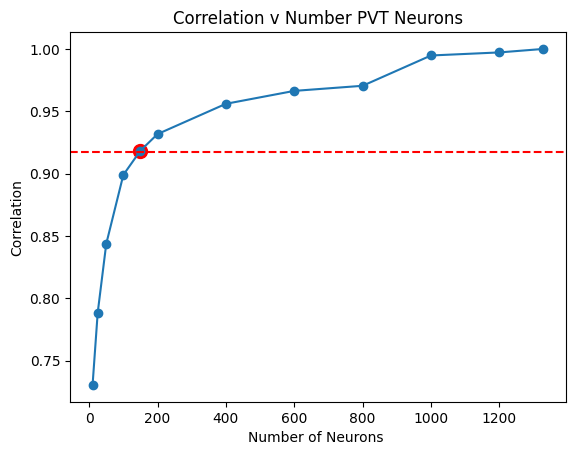

In [176]:
x = list(new_dict.keys())
y = list(new_dict.values())

plt.plot(x, y,'o-')
plt.xlabel('Number of Neurons ')
plt.ylabel('Correlation')
plt.title('Correlation v Number PVT Neurons')

# Specify the index of the point to highlight
highlight_index = 4

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.9172
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

plt.show()
#np.perm
##permute what exactly?


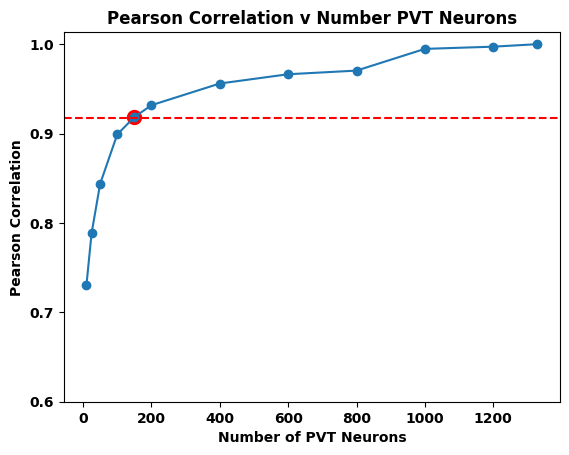

In [222]:
import numpy as np
import matplotlib.pyplot as plt

x = list(new_dict.keys())
y = list(new_dict.values())

plt.plot(x, y, 'o-')
plt.xlabel('Number of PVT Neurons', fontweight='bold')
plt.ylabel('Pearson Correlation', fontweight='bold')
plt.title('Pearson Correlation v Number PVT Neurons', fontweight='bold')

# Specify the index of the point to highlight
highlight_index = 4

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.9172
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

# Bolden the x and y tick labels
plt.xticks(fontweight='bold')

# Set y-axis tick locations and labels
ytick_locs = np.arange(0.6, 1.1, 0.1)
ytick_locs = ytick_locs[ytick_locs <= max(y)]

plt.yticks(ytick_locs, fontweight='bold')

plt.show()


# OPC (700)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


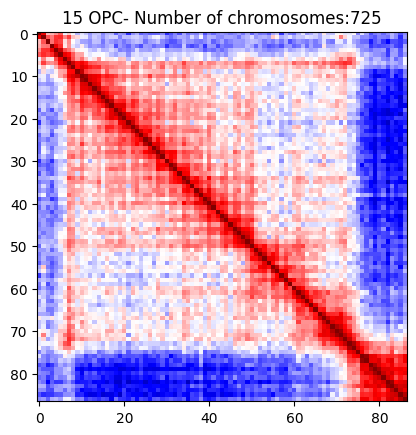

In [122]:
mats_ = mats[np.in1d(cells_fs,cell_type_cells[str(15)])]
keep = np.arange(mats_.shape[1])#[2::3]
print(keep)
plt.figure()
plt.title(str(15)+" OPC"+'- Number of chromosomes:'+str(len(mats_)))
plt.imshow(np.nanmedian(mats_[:,keep][:,:,keep],0),
vmax=0.75,vmin=0.2,cmap='seismic_r',interpolation='nearest')
plt.show()


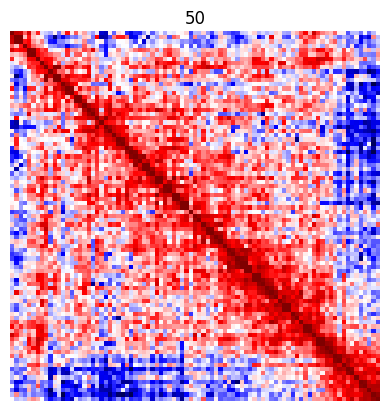

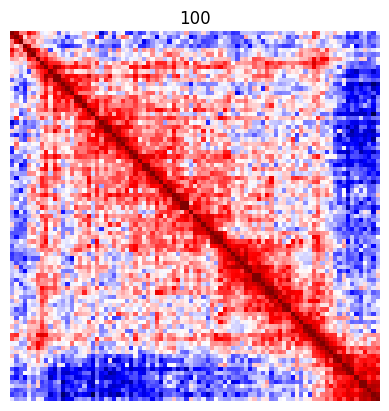

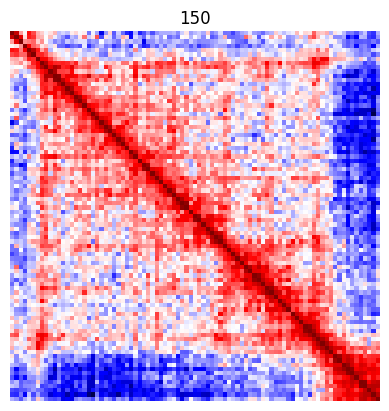

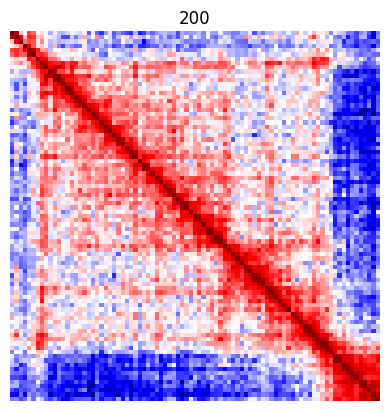

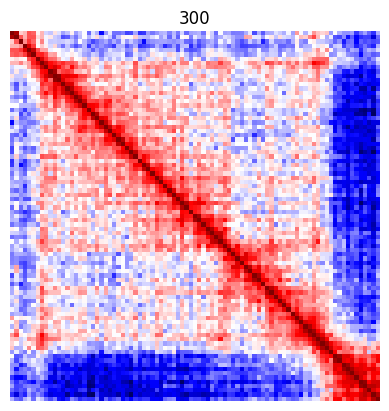

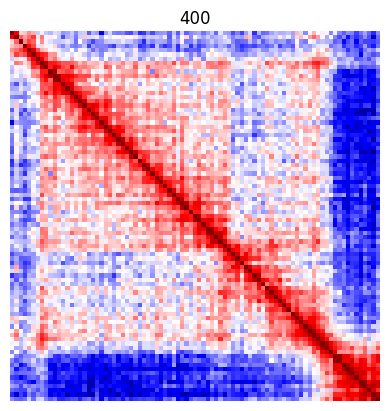

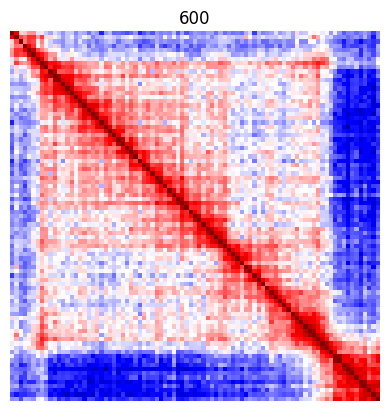

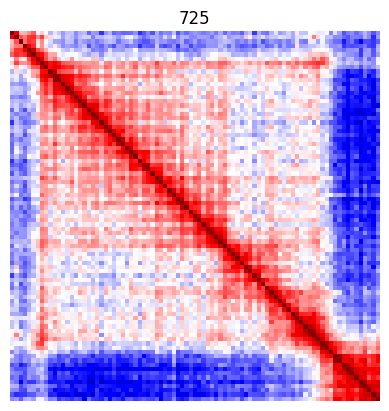

In [230]:
import numpy as np
import matplotlib.pyplot as plt

intervals = [50,100,150,200, 300, 400, 600, 725]
#intervals = [725]
for element in intervals:
    mats_ = mats[np.in1d(cells_fs, cell_type_cells[str(15)])][:element]
    keep = np.arange(mats_.shape[1])#[2::3]
    
    plt.figure()
    plt.title(str(len(mats_)))
    plt.imshow(np.nanmedian(mats_[:, keep][:, :, keep], 0),
               vmax=0.75, vmin=0.2, cmap='seismic_r', interpolation='nearest')

    #Add color scale bar
    #cbar = plt.colorbar()
    #cbar.ax.tick_params(labelsize=15)
    #cbar.ax.yaxis.set_tick_params(fontweight='bold')


    # Make the axis lines bolder
    ax = plt.gca()
    ax.spines['left'].set_linewidth(2)  # Bolder left spine
    ax.spines['bottom'].set_linewidth(2)  # Bolder bottom spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.tick_params(width=2)  # Bolder tick width
    
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    title = "OPC" + '- Number of chromosomes:' + str(len(mats_)) + ".png"
    #plt.savefig(title)  # Save the figure as an image
    plt.axis('off')
    plt.show()


['OPC_IMAGES\\OPC100.png', 'OPC_IMAGES\\OPC150.png', 'OPC_IMAGES\\OPC200.png', 'OPC_IMAGES\\OPC25.png', 'OPC_IMAGES\\OPC300.png', 'OPC_IMAGES\\OPC400.png', 'OPC_IMAGES\\OPC50.png', 'OPC_IMAGES\\OPC600.png', 'OPC_IMAGES\\OPC725.png']
OPC_IMAGES\OPC100.png
0.8431444140409627
OPC_IMAGES\OPC150.png
0.8890298391975491
OPC_IMAGES\OPC200.png
0.924674865559204
OPC_IMAGES\OPC25.png
0.6241654116644442
OPC_IMAGES\OPC300.png
0.9525447646169286
OPC_IMAGES\OPC400.png
0.9644354662596767
OPC_IMAGES\OPC50.png
0.6851957111954728
OPC_IMAGES\OPC600.png
0.9872689378722411
OPC_IMAGES\OPC725.png
0.9999999999999998
[25, 50, 100, 150, 200, 300, 400, 600, 725]
[0.6241654116644442, 0.6851957111954728, 0.8431444140409627, 0.8890298391975491, 0.924674865559204, 0.9525447646169286, 0.9644354662596767, 0.9872689378722411, 0.9999999999999998]


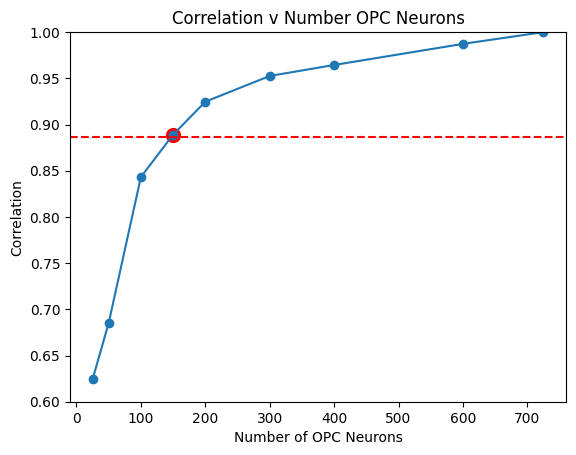

In [231]:
images2 = glob.glob(r"OPC_IMAGES/*.PNG")
print(images2)

reference = Image.open(r'OPC_IMAGES\\OPC725.png')
refData = asarray(reference)
dictLol2 = {}
for element in images2:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(),refData.ravel())[0,1]
    print(coff)
    
    dictLol2[element] = coff
    
modified_dict2 = {}

for key in dictLol2:
    modified_key2 = key.split('\\')[-1].split('.')[0]
    modified_key2 = modified_key2.replace('OPC', '')
    modified_key2 = int(modified_key2)
    modified_dict2[modified_key2] = dictLol2[key]

#print(modified_dict)
Keys2 = list(modified_dict2.keys())
Keys2.sort()
new_dict2 = {key: modified_dict2[key] for key in Keys2}

x = list(new_dict2.keys())
y = list(new_dict2.values())

print(x)
print(y)
plt.plot(x, y,'o-')
plt.xlabel('Number of OPC Neurons')
plt.ylabel('Correlation')
plt.title('Correlation v Number OPC Neurons')

# Specify the index of the point to highlight
highlight_index = 3

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.887
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')
plt.ylim(0.6, 1.0)
plt.show()
#np.perm
##permute what exactly?



['OPC_IMAGES\\OPC100.png', 'OPC_IMAGES\\OPC150.png', 'OPC_IMAGES\\OPC200.png', 'OPC_IMAGES\\OPC25.png', 'OPC_IMAGES\\OPC300.png', 'OPC_IMAGES\\OPC400.png', 'OPC_IMAGES\\OPC50.png', 'OPC_IMAGES\\OPC600.png', 'OPC_IMAGES\\OPC725.png']
OPC_IMAGES\OPC100.png
0.8431444140409627
OPC_IMAGES\OPC150.png
0.8890298391975491
OPC_IMAGES\OPC200.png
0.924674865559204
OPC_IMAGES\OPC25.png
0.6241654116644442
OPC_IMAGES\OPC300.png
0.9525447646169286
OPC_IMAGES\OPC400.png
0.9644354662596767
OPC_IMAGES\OPC50.png
0.6851957111954728
OPC_IMAGES\OPC600.png
0.9872689378722411
OPC_IMAGES\OPC725.png
0.9999999999999998
[25, 50, 100, 150, 200, 300, 400, 600, 725]
[0.6241654116644442, 0.6851957111954728, 0.8431444140409627, 0.8890298391975491, 0.924674865559204, 0.9525447646169286, 0.9644354662596767, 0.9872689378722411, 0.9999999999999998]


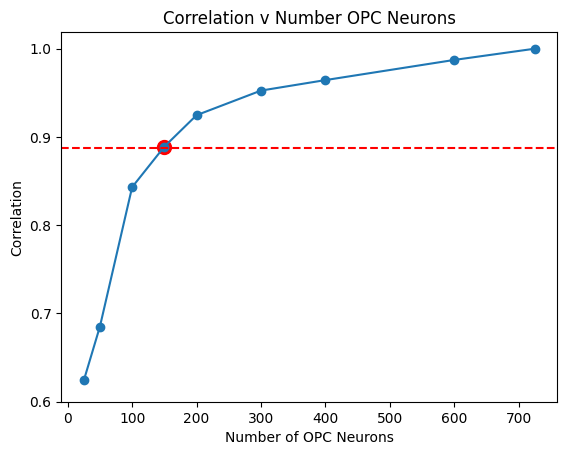

In [236]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

images2 = glob.glob(r"OPC_IMAGES/*.PNG")
print(images2)

reference = Image.open(r'OPC_IMAGES\\OPC725.png')
refData = asarray(reference)
dictLol2 = {}
for element in images2:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(), refData.ravel())[0, 1]
    print(coff)

    dictLol2[element] = coff

modified_dict2 = {}

for key in dictLol2:
    modified_key2 = key.split('\\')[-1].split('.')[0]
    modified_key2 = modified_key2.replace('OPC', '')
    modified_key2 = int(modified_key2)
    modified_dict2[modified_key2] = dictLol2[key]

#print(modified_dict)
Keys2 = list(modified_dict2.keys())
Keys2.sort()
new_dict2 = {key: modified_dict2[key] for key in Keys2}

x = list(new_dict2.keys())
y = list(new_dict2.values())

print(x)
print(y)
plt.plot(x, y, 'o-')
plt.xlabel('Number of OPC Neurons')
plt.ylabel('Correlation')
plt.title('Correlation v Number OPC Neurons')

# Specify the index of the point to highlight
highlight_index = 3

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.887
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')
ytick_locs = np.arange(0.6, 1.1, 0.1)

ytick_locs = ytick_locs[ytick_locs <= 1.0]
plt.yticks(ytick_locs)
plt.show()
#np.perm
##permute what exactly?


['OPC_IMAGES\\OPC100.png', 'OPC_IMAGES\\OPC150.png', 'OPC_IMAGES\\OPC200.png', 'OPC_IMAGES\\OPC25.png', 'OPC_IMAGES\\OPC300.png', 'OPC_IMAGES\\OPC400.png', 'OPC_IMAGES\\OPC50.png', 'OPC_IMAGES\\OPC600.png', 'OPC_IMAGES\\OPC725.png']
OPC_IMAGES\OPC100.png
0.8431444140409627
OPC_IMAGES\OPC150.png
0.8890298391975491
OPC_IMAGES\OPC200.png
0.924674865559204
OPC_IMAGES\OPC25.png
0.6241654116644442
OPC_IMAGES\OPC300.png
0.9525447646169286
OPC_IMAGES\OPC400.png
0.9644354662596767
OPC_IMAGES\OPC50.png
0.6851957111954728
OPC_IMAGES\OPC600.png
0.9872689378722411
OPC_IMAGES\OPC725.png
0.9999999999999998
[25, 50, 100, 150, 200, 300, 400, 600, 725]
[0.6241654116644442, 0.6851957111954728, 0.8431444140409627, 0.8890298391975491, 0.924674865559204, 0.9525447646169286, 0.9644354662596767, 0.9872689378722411, 0.9999999999999998]


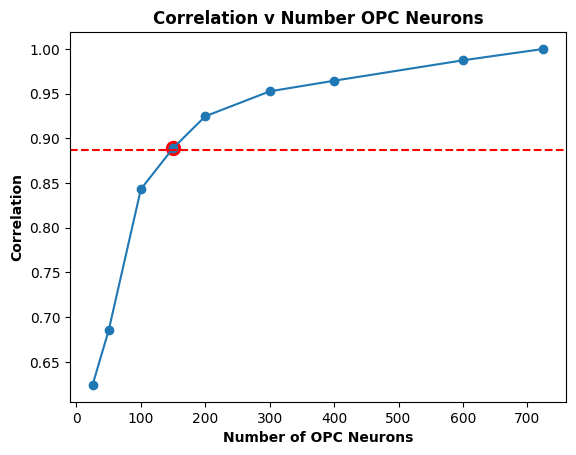

In [211]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

images2 = glob.glob(r"OPC_IMAGES/*.PNG")
print(images2)

reference = Image.open(r'OPC_IMAGES\\OPC725.png')
refData = asarray(reference)
dictLol2 = {}
for element in images2:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(), refData.ravel())[0, 1]
    print(coff)

    dictLol2[element] = coff

modified_dict2 = {}

for key in dictLol2:
    modified_key2 = key.split('\\')[-1].split('.')[0]
    modified_key2 = modified_key2.replace('OPC', '')
    modified_key2 = int(modified_key2)
    modified_dict2[modified_key2] = dictLol2[key]

#print(modified_dict)
Keys2 = list(modified_dict2.keys())
Keys2.sort()
new_dict2 = {key: modified_dict2[key] for key in Keys2}

x = list(new_dict2.keys())
y = list(new_dict2.values())

print(x)
print(y)
plt.plot(x, y, 'o-')
plt.xlabel('Number of OPC Neurons', fontweight='bold')
plt.ylabel('Correlation', fontweight='bold')
plt.title('Correlation v Number OPC Neurons', fontweight='bold')

# Specify the index of the point to highlight
highlight_index = 3

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.887
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

plt.show()
#np.perm
##permute what exactly?


['OPC_IMAGES\\OPC100.png', 'OPC_IMAGES\\OPC150.png', 'OPC_IMAGES\\OPC200.png', 'OPC_IMAGES\\OPC25.png', 'OPC_IMAGES\\OPC300.png', 'OPC_IMAGES\\OPC400.png', 'OPC_IMAGES\\OPC50.png', 'OPC_IMAGES\\OPC600.png', 'OPC_IMAGES\\OPC725.png']
OPC_IMAGES\OPC100.png
0.8431444140409627
OPC_IMAGES\OPC150.png
0.8890298391975491
OPC_IMAGES\OPC200.png
0.924674865559204
OPC_IMAGES\OPC25.png
0.6241654116644442
OPC_IMAGES\OPC300.png
0.9525447646169286
OPC_IMAGES\OPC400.png
0.9644354662596767
OPC_IMAGES\OPC50.png
0.6851957111954728
OPC_IMAGES\OPC600.png
0.9872689378722411
OPC_IMAGES\OPC725.png
0.9999999999999998
[25, 50, 100, 150, 200, 300, 400, 600, 725]
[0.6241654116644442, 0.6851957111954728, 0.8431444140409627, 0.8890298391975491, 0.924674865559204, 0.9525447646169286, 0.9644354662596767, 0.9872689378722411, 0.9999999999999998]


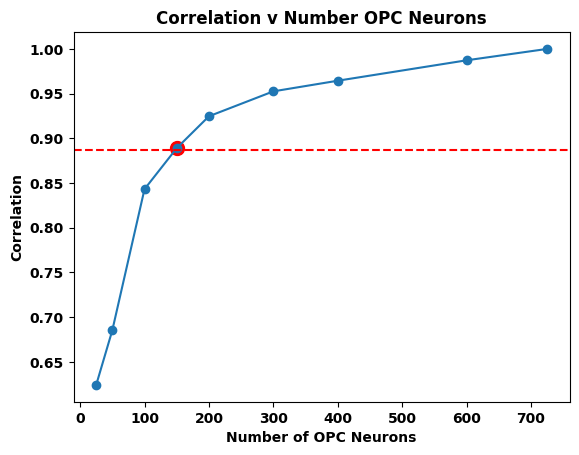

In [212]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

images2 = glob.glob(r"OPC_IMAGES/*.PNG")
print(images2)

reference = Image.open(r'OPC_IMAGES\\OPC725.png')
refData = asarray(reference)
dictLol2 = {}
for element in images2:
    print(element)
    holder = Image.open(element)
    dataHolder = asarray(holder)
    coff = np.corrcoef(dataHolder.ravel(), refData.ravel())[0, 1]
    print(coff)

    dictLol2[element] = coff

modified_dict2 = {}

for key in dictLol2:
    modified_key2 = key.split('\\')[-1].split('.')[0]
    modified_key2 = modified_key2.replace('OPC', '')
    modified_key2 = int(modified_key2)
    modified_dict2[modified_key2] = dictLol2[key]

#print(modified_dict)
Keys2 = list(modified_dict2.keys())
Keys2.sort()
new_dict2 = {key: modified_dict2[key] for key in Keys2}

x = list(new_dict2.keys())
y = list(new_dict2.values())

print(x)
print(y)
plt.plot(x, y, 'o-')
plt.xlabel('Number of OPC Neurons', fontweight='bold')
plt.ylabel('Correlation', fontweight='bold')
plt.title('Correlation v Number OPC Neurons', fontweight='bold')

# Specify the index of the point to highlight
highlight_index = 3

# Highlight the specific point
plt.scatter(x[highlight_index], y[highlight_index], color='red', label='Highlighted Point', s=100)

horizontal_line_value = 0.887
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', label='Horizontal Line')

# Bolden the x and y tick labels
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()
#np.perm
##permute what exactly?


In [136]:
new_dict2

{25: 0.6241654116644442,
 50: 0.6851957111954728,
 100: 0.8431444140409627,
 150: 0.8890298391975491,
 200: 0.924674865559204,
 300: 0.9525447646169286,
 400: 0.9644354662596767,
 600: 0.9872689378722411,
 725: 0.9999999999999998}

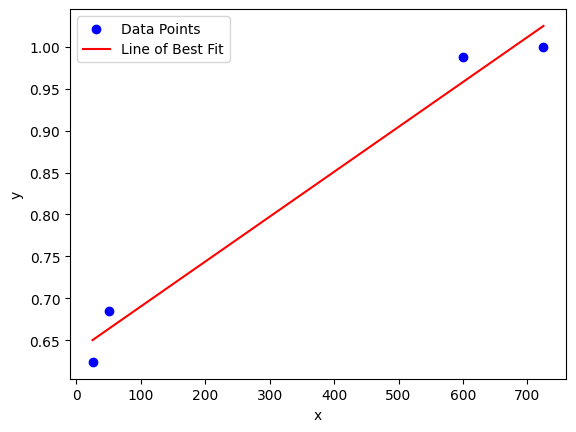

In [139]:
#OPC
data = {
    25: 0.6241654116644442,
    50: 0.6851957111954728,
    600: 0.9872689378722411,
    725: 0.9999999999999998
}

x = list(data.keys())
y = list(data.values())


x_fit = x[:2] + x[-2:]
y_fit = y[:2] + y[-2:]
coefficients = np.polyfit(x_fit, y_fit, 1)
line = np.poly1d(coefficients)


x_line = np.linspace(min(x_fit), max(x_fit), 100)


plt.scatter(x_fit, y_fit, color='blue', label='Data Points')
plt.plot(x_line, line(x_line), color='red', label='Line of Best Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

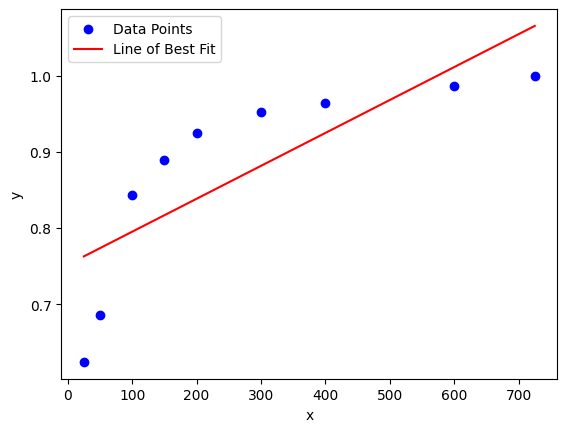

In [138]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    25: 0.6241654116644442,
    50: 0.6851957111954728,
    100: 0.8431444140409627,
    150: 0.8890298391975491,
    200: 0.924674865559204,
    300: 0.9525447646169286,
    400: 0.9644354662596767,
    600: 0.9872689378722411,
    725: 0.9999999999999998
}

x = list(data.keys())
y = list(data.values())

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Generate additional x values for plotting the line
x_line = np.linspace(min(x), max(x), 100)

# Plot the original data and the line of best fit
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_line, line(x_line), color='red', label='Line of Best Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()